In [1]:
#Python Language Version 

from platform import python_version
print('Versão da Linguagem Python Usada neste projeto:', python_version())

Versão da Linguagem Python Usada neste projeto: 3.8.5


# Análise Estatística e Modelagem Preditiva de Séries Temporais - Em Python

### Projeto - Qual o Efeito da Legalização da Maconha na Taxa de Criminalidade ao Longo do Tempo?

![Rodolfo Terra](https://raw.githubusercontent.com/rodolffoterra/Projct_Marijuana_Legalization_TS/main/imagnes/layout3.png)

### Definição do Problema

Em 2016, os eleitores da Califórnia nos EUA aprovaram a Proposição 64, que legalizou o uso recreativo da maconha no estado. Neste link você encontra os detalhes sobre a aprovação da Proposição 64:

<a href="https://ballotpedia.org/California_Proposition_64,_Marijuana_Legalization_(2016)">California Proposition 64, Marijuana Legalization (2016)</a>

Os opositores à medida apresentaram cinco principais objeções à mudança no Guia Oficial de Informações do Eleitor do estado. Eles argumentaram que a legalização:

- (1) Dobraria o número de mortes nas rodovias.
- (2) Permitiria o cultivo de maconha perto de escolas e parques.
- (3) Aumentaria a atividade do mercado negro e do cartel.
- (4) Prejudicaria as comunidades pobres com problemas de dependência por meio do influxo de novos pontos de vendas de maconha.
- (5) Aumentaria a criminalidade ao longo do tempo, especialmente nas áreas próximas aos pontos de venda de maconha legalizada (cada ponto de venda de maconha legalizada é chamado de marijuana dispensary). 

Vamos realizar uma análise de dados com base em séries temporais e análises geoespaciais, além de outras técnicas exploratórias mais gerais, para examinar se essas previsões se tornaram realidade em Los Angeles desde que a legalização entrou em vigor. Nosso foco principal será nos dados disponíveis sobre detenções por crimes relacionados à maconha e na taxa geral de crimes nas proximidades de dispensários. Vamos focar principalmente nos itens 2, 4 e 5 acima.

Os dados usados neste projeto estão disponíveis publicamente e são oferecidos pelo portal de dados abertos do governo de Los Angeles.

Você é favor ou contra a legalização da Maconha? Acompanhe o projeto passo a passo, leia atentamente cada comentário e então emita sua opinião com base em dados.

# Sumário:

- Análise exploratória dos dados.
- Construção de gráficos com Geolocalização, mostrando a localidade exata de ocorrência de cada evento.
- Transformação e segmentação dos dados por período de tempo.
- Cálculo de distância entre os eventos com base na geolocalização usando o pacote geopy.
- Resumo estatístico das variáveis.
- Análise e interpretação das distribuição das variáveis.
- Teste de normalidade para verificar se as amostras de dados foram extraídas de uma população que segue uma distribuição normal.
- Análise e interpretação do valor-p.
- Conclusões da análise exploratória.

### Carregando os Pacotes Usados Neste Jupyter Notebook

In [1]:
# The new versions of Pandas and Matplotlib bring several warning messages to the developer.; Let's disable this
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports for data Manipulation 
import scipy
import pandas as pd
import matplotlib as m
import matplotlib.pyplot as plt
from scipy import stats

# Import for bformatting graphics

m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 15,7
plt.style.use('fivethirtyeight')
%matplotlib inline

## Análise Exploratória

Na Parte 1 e 2 do projeto trabalhamos na extração dos dados. Fizemos uma série de limpezas e transformações e deixamos os dados organizados para a etapa seguinte, na qual trabalharemos agora: análise exploratória e modelagem estatística. Nosso objetivo é compreender não apenas os dados, mas eventuais problemas que eles possam apresentar!


### Número de Prisões Associadas à Maconha


Nossa primeira tarefa será analisar as prisões associadas à maconha, o objetivo principal do nosso estudo. Fique à vontade para explorar outros detalhes dos dados se desejar.

In [3]:
# # Loading prison data
df_prisoes = pd.read_csv('dados/df_prisoes.csv')

In [4]:
# Shape
df_prisoes.shape

(20673, 21)

In [5]:
# We preview a sample of data
df_prisoes.head()

,Unnamed: 0,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,latitude,longitude,marijuana_related
0,340,5568617,2019-03-09,2015.0,6,Hollywood,646,29,M,O,...,Narcotic Drug Laws,F,11359HS,possession marijuana for sale,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale
1,342,5568629,2019-03-09,2015.0,6,Hollywood,646,25,M,B,...,Narcotic Drug Laws,F,11359HS,possession marijuana for sale,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale
2,983,5607178,2019-04-21,2115.0,7,Wilshire,702,42,M,B,...,Narcotic Drug Laws,F,11359(D)HS,poss/sale marij ovr 21 employ per 20/belw,MELROSE AV,FAIRFAX AV,"['34.0838', '-118.3614']",34.0838,-118.3614,poss/sale marij ovr 21 employ per 20/belw
3,1249,200608837,2020-03-17,2200.0,6,Hollywood,646,21,F,B,...,Narcotic Drug Laws,I,11362.3A1HS,smoke/ingest marijuana in public place,HOLLYWOOD,VINE,"['34.1016', '-118.3267']",34.1016,-118.3267,smoke/ingest marijuana in public place
4,1255,200608903,2020-03-19,2320.0,6,Hollywood,645,25,M,W,...,Narcotic Drug Laws,I,11362.3A1HS,smoke/ingest marijuana in public place,HOLLYWOOD,HIGHLAND,"['34.1016', '-118.3387']",34.1016,-118.3387,smoke/ingest marijuana in public place


In [6]:
# Statistical Summary
df_prisoes.describe()

,Unnamed: 0,Report ID,Time,Area ID,Reporting District,Age,Charge Group Code,latitude,longitude
count,2.067300e+04,2.067300e+04,20670.000000,20673.000000,20673.000000,20673.000000,20673.0,20673.000000,20673.000000
mean,5.421069e+05,5.327595e+07,1523.879971,10.980941,1146.309196,29.037489,16.0,34.053144,-118.304159
std,3.585493e+05,5.941124e+07,530.155180,6.080943,606.506447,11.246525,0.0,0.720001,2.471156
min,3.400000e+02,2.586000e+03,1.000000,1.000000,100.000000,11.000000,16.0,0.000000,-118.664700
25%,1.968940e+05,3.119415e+06,1245.000000,6.000000,645.000000,20.000000,16.0,33.993300,-118.434500
50%,5.307320e+05,4.815994e+06,1615.000000,12.000000,1239.000000,26.000000,16.0,34.048200,-118.330600
75%,8.068310e+05,1.103068e+08,1905.000000,16.000000,1656.000000,35.000000,16.0,34.167600,-118.276200
max,1.349967e+06,2.019007e+08,2358.000000,21.000000,2197.000000,79.000000,16.0,34.547700,0.000000


In [7]:
# Minimum value Date
df_prisoes['Arrest Date'].min()

'2010-01-01'

In [9]:
# Maximum value Date
df_prisoes['Arrest Date'].max()

'2020-05-08'

Não precisamos analisar as prisões em todas as datas. Vamos considerar somente as prisões entre 2014 e 2019, pois esse período compreende o antes e depois da data de legalização da maconha. A maconha foi legalizada em 2016 e liberação entrou em vigor em 2017. Assim teremos dados de 3 anos antes da liberação e 3 anos depois. Isso deve ser suficiente para a análise.

In [14]:
# Filters the dataframe keeping only records between 2014 and 20199
df_prisoes = df_prisoes[(df_prisoes['Arrest Date'] >= '2014-01-01') & (df_prisoes['Arrest Date'] <= '2019-12-31')]

In [15]:
# Shape
df_prisoes.shape

(6226, 21)

Ok. Vamos salvar o resultado em um arquivo csv.

In [16]:
# Save the file to disk (now without the index)
df_prisoes.to_csv('dados/df_prisoes_parte2.csv', index = False)

Criaremos um gráfico de prisões considerando Geolocalização, ou seja, dados de latitude e longitude. Isso é mais fácil do que parece, desde que os dados estejam disponíveis.

Se criarmos um único gráfico com todos os dados, isso vai dificultar nossa visualização. Vamos então dividir os dados por ano e avaliaremos 6 anos: 2014, 2015, 2016, 2017, 2018 e 2019.

In [17]:
# We created dataframe with records fot the years 2014 to 2019
df_prisoes_2014 = df_prisoes[(df_prisoes['Arrest Date'] < '2015-01-01') & (df_prisoes['Arrest Date'] >= '2014-01-01')]
df_prisoes_2015 = df_prisoes[(df_prisoes['Arrest Date'] < '2016-01-01') & (df_prisoes['Arrest Date'] >= '2015-01-01')]
df_prisoes_2016 = df_prisoes[(df_prisoes['Arrest Date'] < '2017-01-01') & (df_prisoes['Arrest Date'] >= '2016-01-01')]
df_prisoes_2017 = df_prisoes[(df_prisoes['Arrest Date'] < '2018-01-01') & (df_prisoes['Arrest Date'] >= '2017-01-01')]
df_prisoes_2018 = df_prisoes[(df_prisoes['Arrest Date'] < '2019-01-01') & (df_prisoes['Arrest Date'] >= '2018-01-01')]
df_prisoes_2019 = df_prisoes[(df_prisoes['Arrest Date'] < '2020-01-01') & (df_prisoes['Arrest Date'] >= '2019-01-01')]

In [18]:
# Prison graph function
def grafico_prisoes(dataframe, titulo):
    
    # Total 
    print(f'Total de Prisões Relacionadas à Maconha: {len(dataframe)}')
    
    # Plot Area
    fig, ax = plt.subplots(figsize = (20,10))
    
    # Graph
    plt.scatter(dataframe['latitude'], dataframe['longitude'], c = 'red', s = 12, alpha = 0.4, label = 'Prisões')
    
    # Labels and Legend
    plt.xlabel('Latitude', fontsize = 20)
    plt.ylabel('Longitude', fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    ax.legend(fontsize = 18)
    plt.title(titulo, fontsize = 26)
    plt.tight_layout()

Total de Prisões Relacionadas à Maconha: 1705


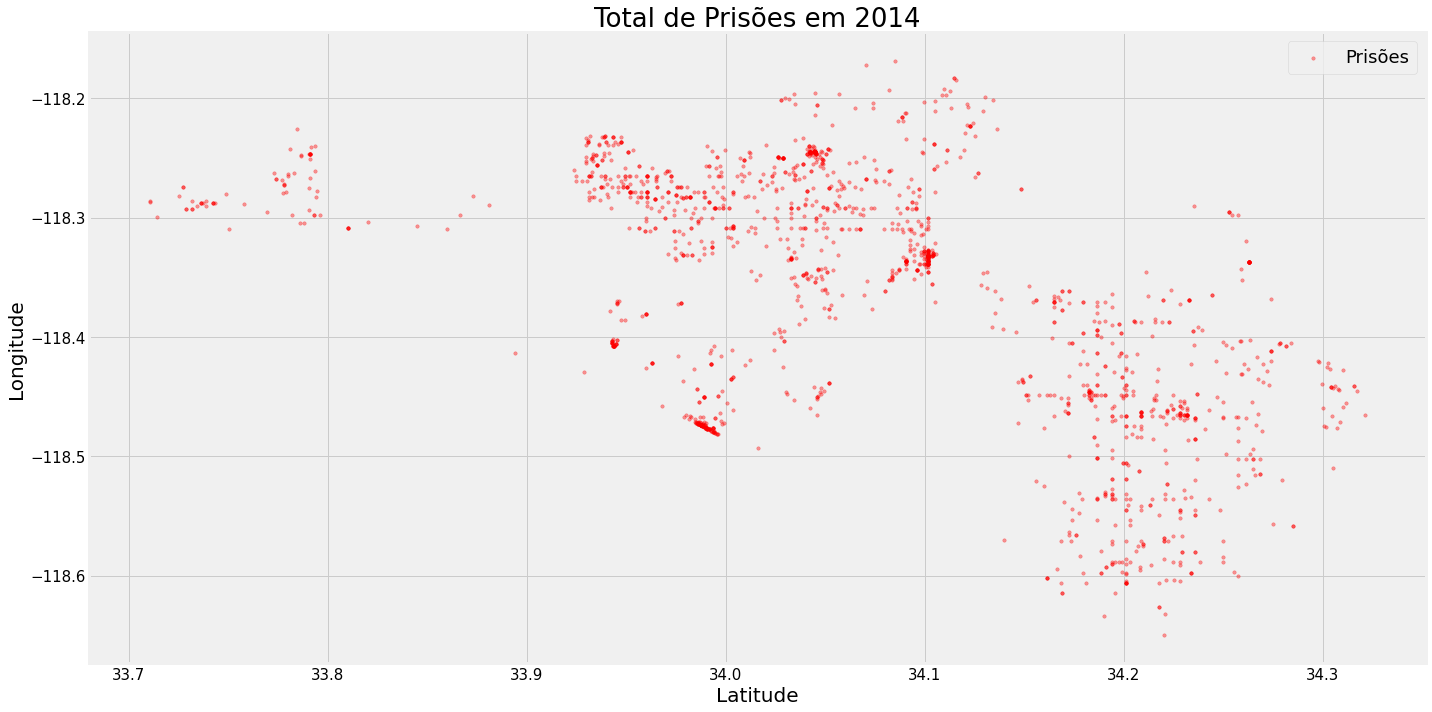

In [20]:
# Total Arrests in 2014
grafico_prisoes(df_prisoes_2014, 'Total de Prisões em 2014')

Total de Prisões Relacionadas à Maconha: 1535


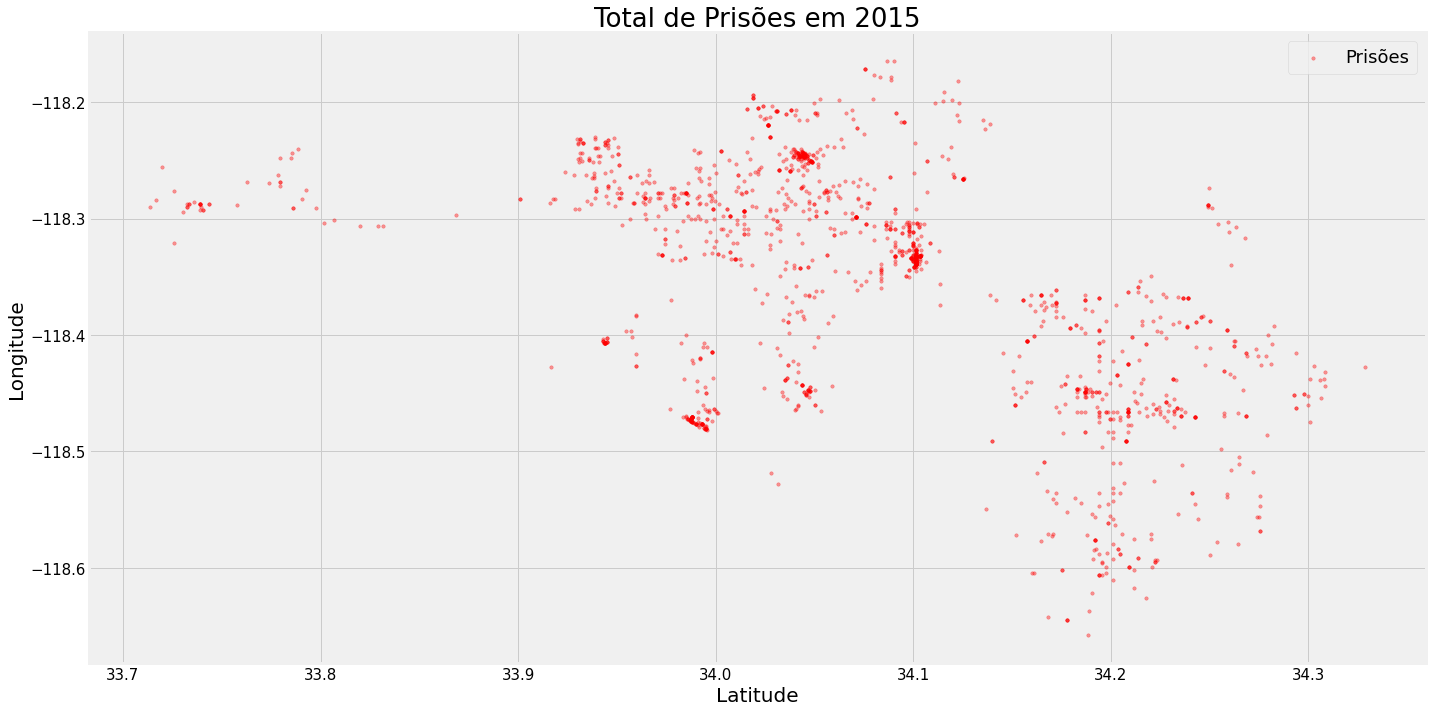

In [21]:
# Total Arrests in 2015
grafico_prisoes(df_prisoes_2015, 'Total de Prisões em 2015')

Total de Prisões Relacionadas à Maconha: 1386


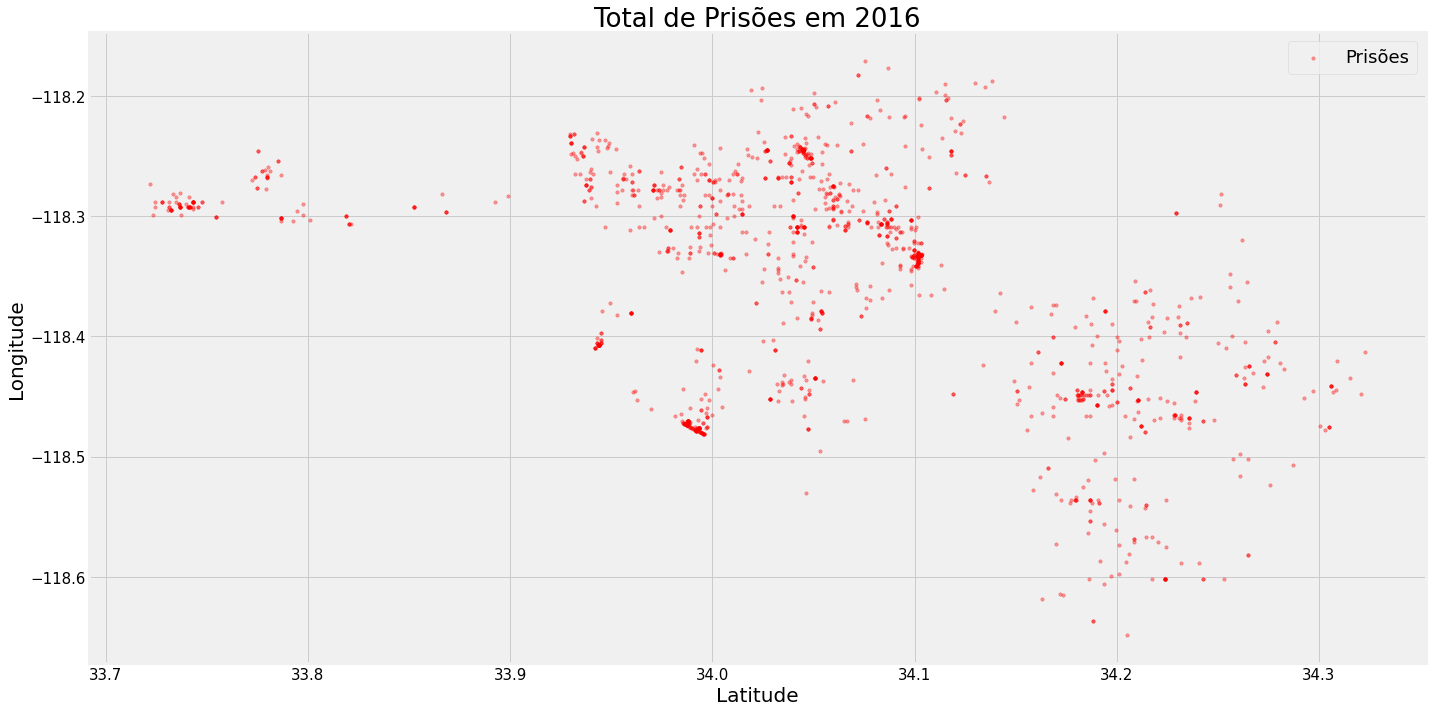

In [22]:
# Total Arrests in 2016
grafico_prisoes(df_prisoes_2016, 'Total de Prisões em 2016')

Total de Prisões Relacionadas à Maconha: 528


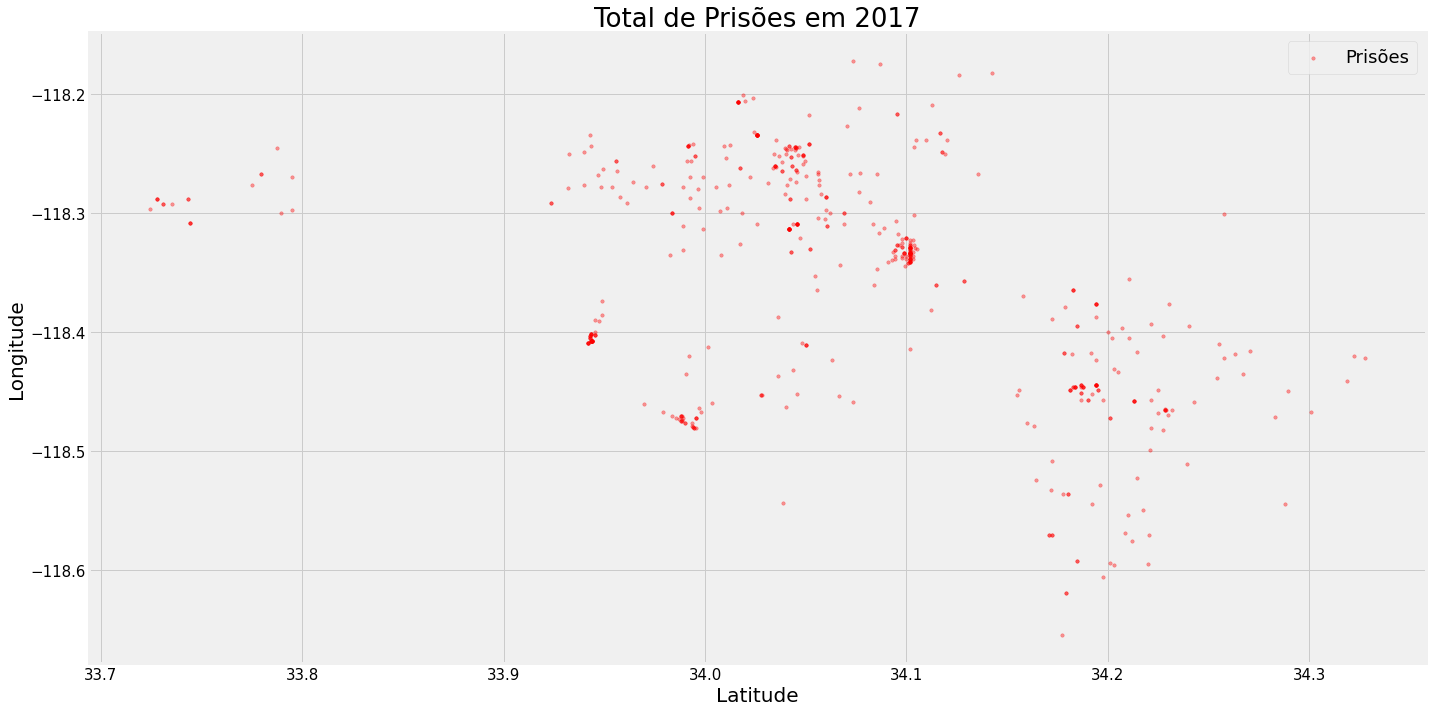

In [23]:
# Total Arrests in 2017
grafico_prisoes(df_prisoes_2017, 'Total de Prisões em 2017')

Total de Prisões Relacionadas à Maconha: 564


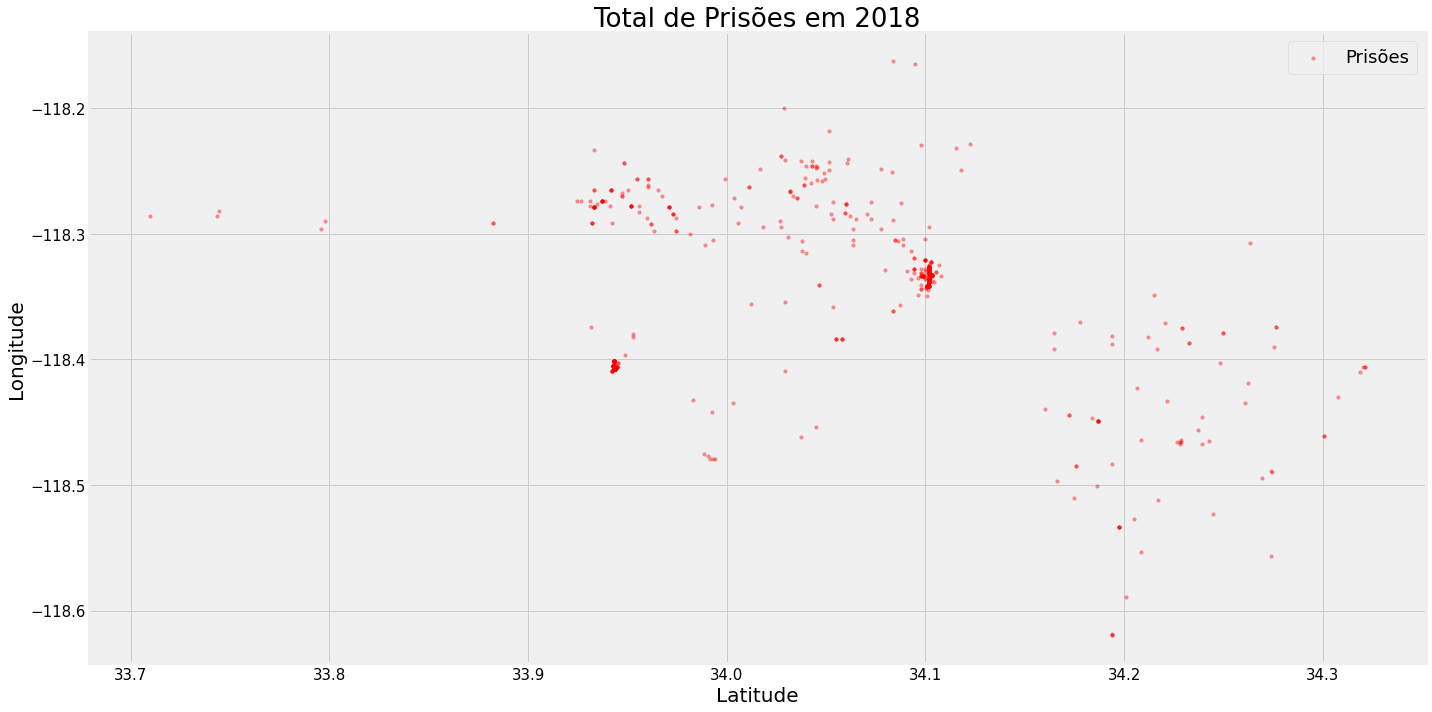

In [24]:
# Total Arrests in 2018
grafico_prisoes(df_prisoes_2018, 'Total de Prisões em 2018')

Total de Prisões Relacionadas à Maconha: 508


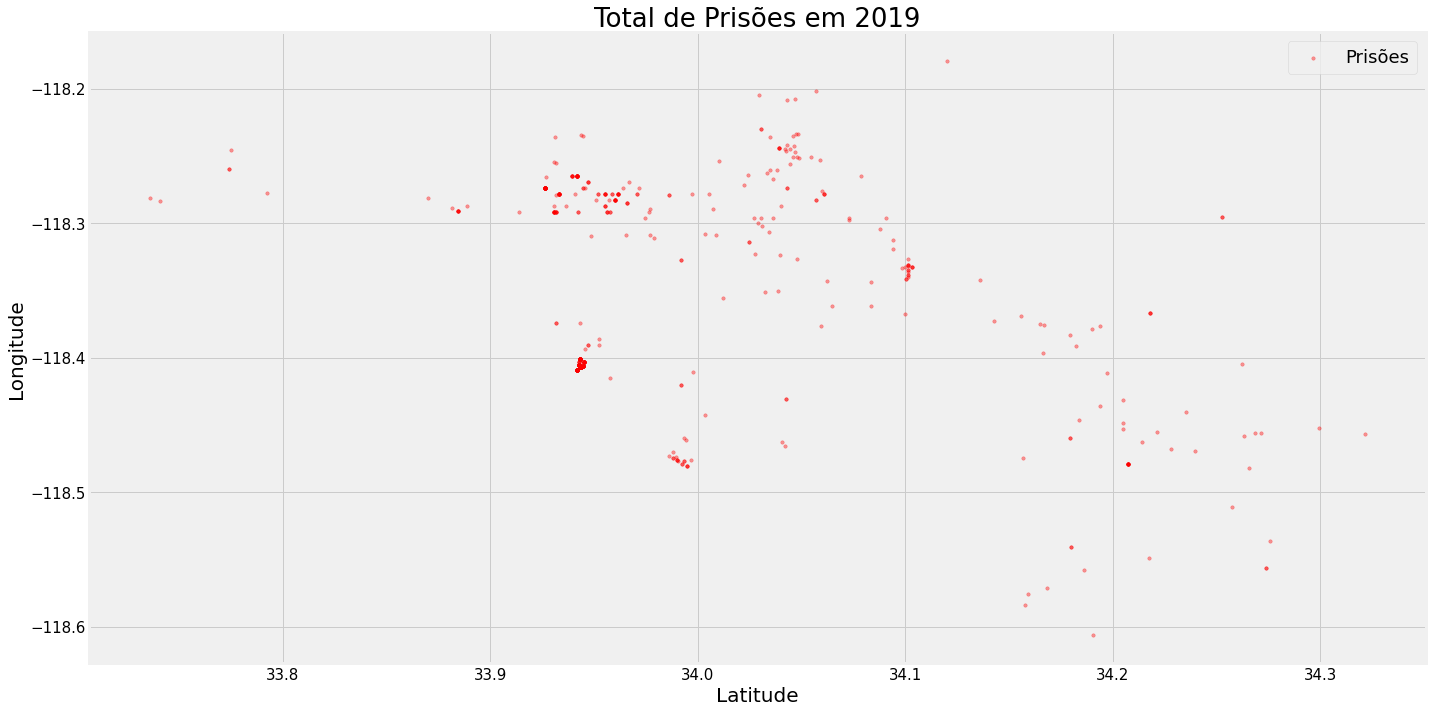

In [25]:
# Total Arrests in 2019
grafico_prisoes(df_prisoes_2019, 'Total de Prisões em 2019')

Os números (e os gráficos) mostram que o total de prisões diminuiu de 2014 a 2019. Não podemos afirmar categoricamente que foi devido à legalização da maconha, mas considerando que este foi o grande evento ocorrido no período (aprovado em 2016 e em vigor a partir de 01/01/2017), já podemos perceber uma tendência.

Vejamos o que aconteceu nas áreas próximas aos pontos de venda legalizada de maconha.

### Prisões Associadas à Maconha e Que Ocorreram Próximo a Pontos de Venda Legalizada de Maconha


In [27]:
# Loading de Dataset
df_lojas = pd.read_csv('dados/df_lojas.csv')

In [28]:
# Shape
df_lojas.shape

(326, 10)

Total de 326 pontos de venda legalizada de maconha.

In [29]:
# Data
df_lojas.head(3)

,Unnamed: 0,name,is_closed,url,rating,price,review_count,latitude,longitude,location
0,0,California Caregivers Alliance,False,https://www.yelp.com/biz/california-caregivers...,4.5,NaN,299,34.08235,-118.272037,"(34.08235, -118.272037)"
1,1,Herbarium,False,https://www.yelp.com/biz/herbarium-west-hollyw...,4.5,$$,289,34.08853,-118.344600,"(34.08853, -118.3446)"
2,2,MedMen Los Angeles - DTLA,False,https://www.yelp.com/biz/medmen-los-angeles-dt...,4.0,$$,344,34.04460,-118.254440,"(34.0446, -118.25444)"


A variável **is_closed** já não fornece nenhuma informação valiosa e a variável **location** é redundante devido às variáveis **latitude** e **longitude**. Além disso, a coluna **url** não é necessária para fins de análise exploratória de dados, portanto as três variáveis serão descartadas. As variáveis rating, price e review_count também não são úteis para esta análise.

De fato, precisamos somente do nome, latitude e longitude.

In [33]:
# Chacking out points of sale with "closed" Status
df_lojas['is_closed'].value_counts()

False    326
Name: is_closed, dtype: int64

In [34]:
# Filtering the dataframe and Keeping only the columns needed for analysis
df_lojas = df_lojas[['name','latitude','longitude']]

In [35]:
# Data
df_lojas.head(3)

,name,latitude,longitude
0,California Caregivers Alliance,34.08235,-118.272037
1,Herbarium,34.08853,-118.344600
2,MedMen Los Angeles - DTLA,34.04460,-118.254440


In [36]:
# Statistical Summary
df_lojas.describe()

,latitude,longitude
count,326.000000,326.000000
mean,34.057990,-118.323361
std,0.090006,0.126262
min,33.760410,-118.848091
25%,34.016497,-118.384080
50%,34.048401,-118.328133
75%,34.099466,-118.256449
max,34.440029,-117.455840


In [37]:
# Save the file to disk (now without the index)
df_lojas.to_csv('dados/df_lojas_parte2.csv', index = False)

In [38]:
# Function for plot of prisons and stores, considering Geolocation by latitude and longitude
def grafico_prisoes_lojas(dataframe_prisoes, ano):
    
    # We define the plot area
    fig, ax = plt.subplots(figsize = (25,15))
    
    # First layer of the chart
    plt.scatter(dataframe_prisoes['longitude'], dataframe_prisoes['latitude'], color = 'r', label = 'Prisões', s = 12)
    
    # Second layer of the chart
    ax.scatter(df_lojas['longitude'], df_lojas['latitude'], color = 'b', label = 'Ponto de Venda', s = 12)
    
    plt.title(f'Prisões x Pontos de Vendas em {ano}', fontsize = 26)
    plt.xlabel('Longitude', fontsize = 20)
    plt.ylabel('Latitude', fontsize = 20)
    ax.legend(fontsize = 20)

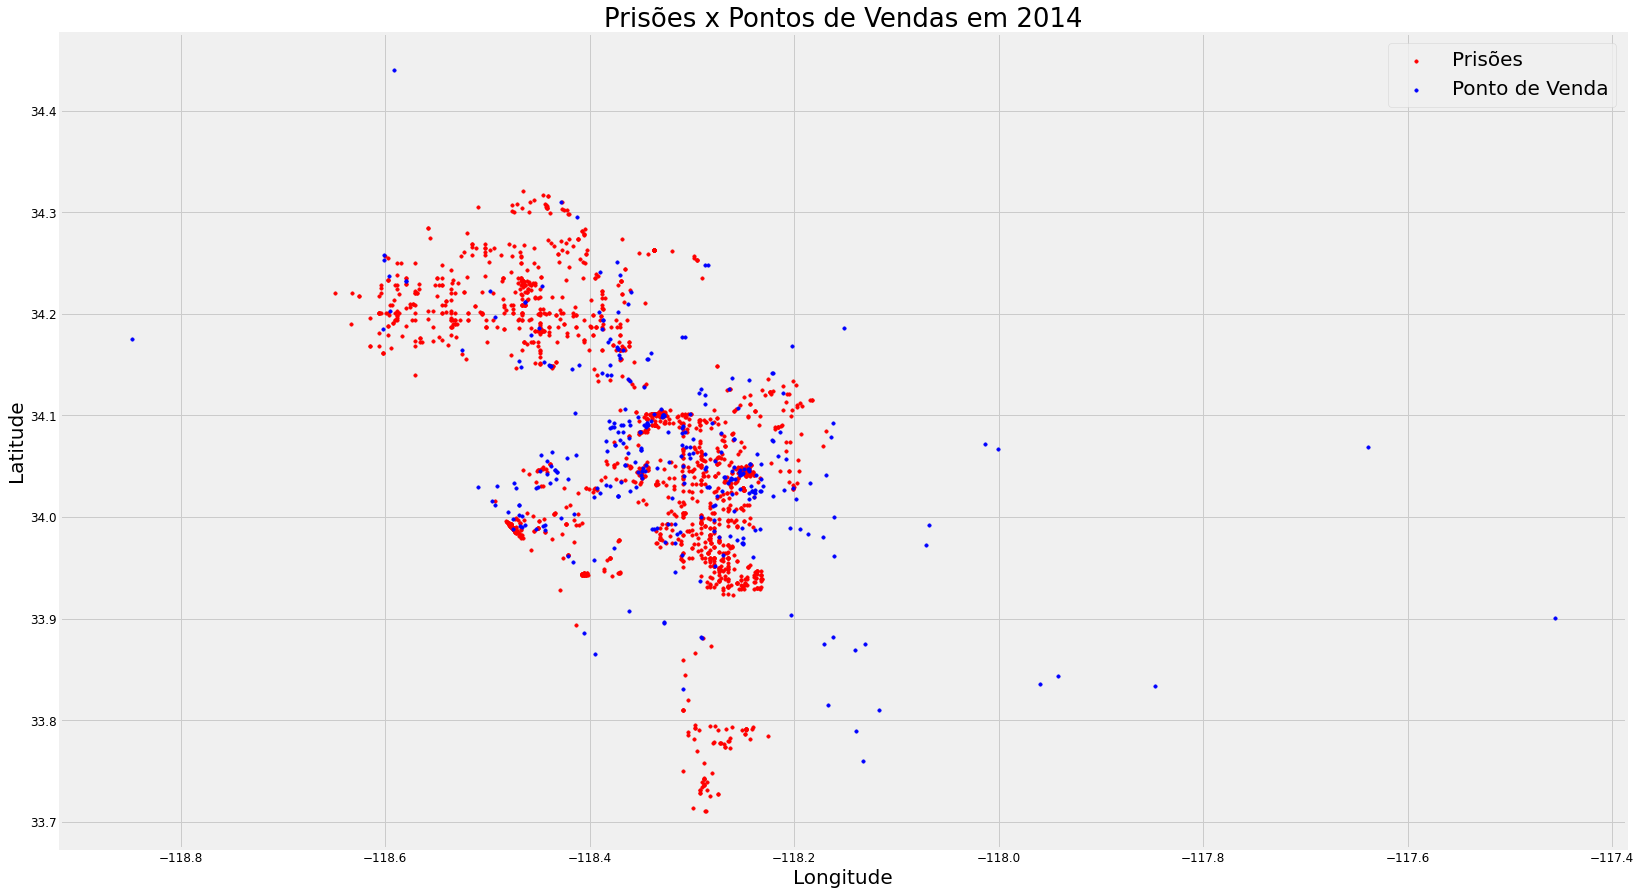

In [39]:
# Graph of Prisons x Sales Points in 2014
# Red prisons
# Sales points in blue
grafico_prisoes_lojas(df_prisoes_2014, 2014)

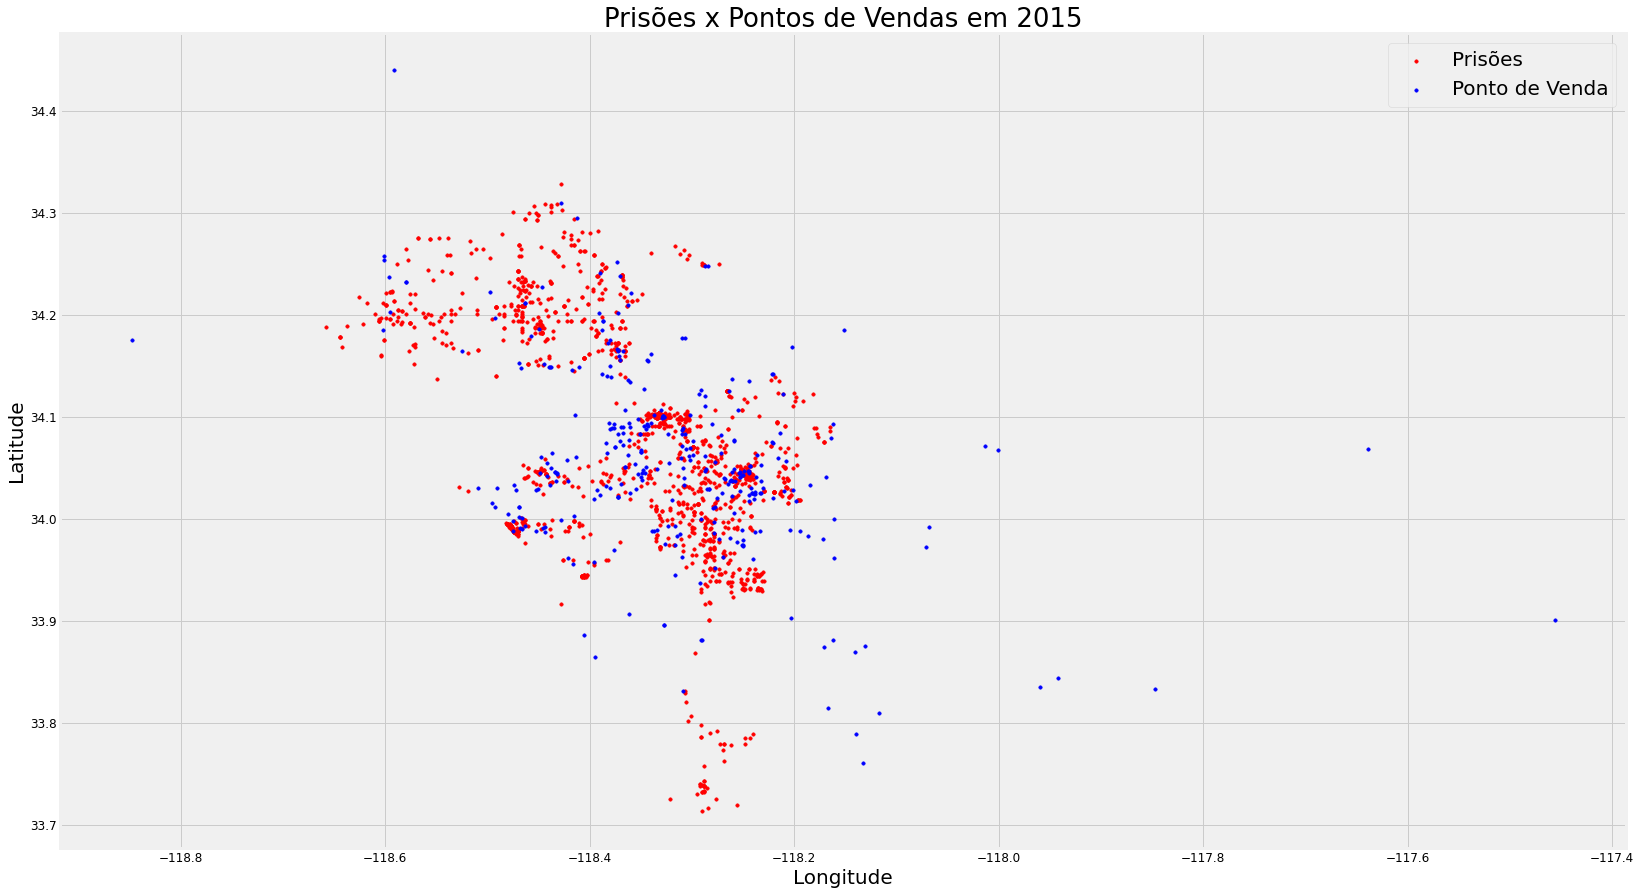

In [40]:
# Graph of Prisons x Sales Points in 2015
# Red prisons
# Sales points in blue
grafico_prisoes_lojas(df_prisoes_2015, 2015)

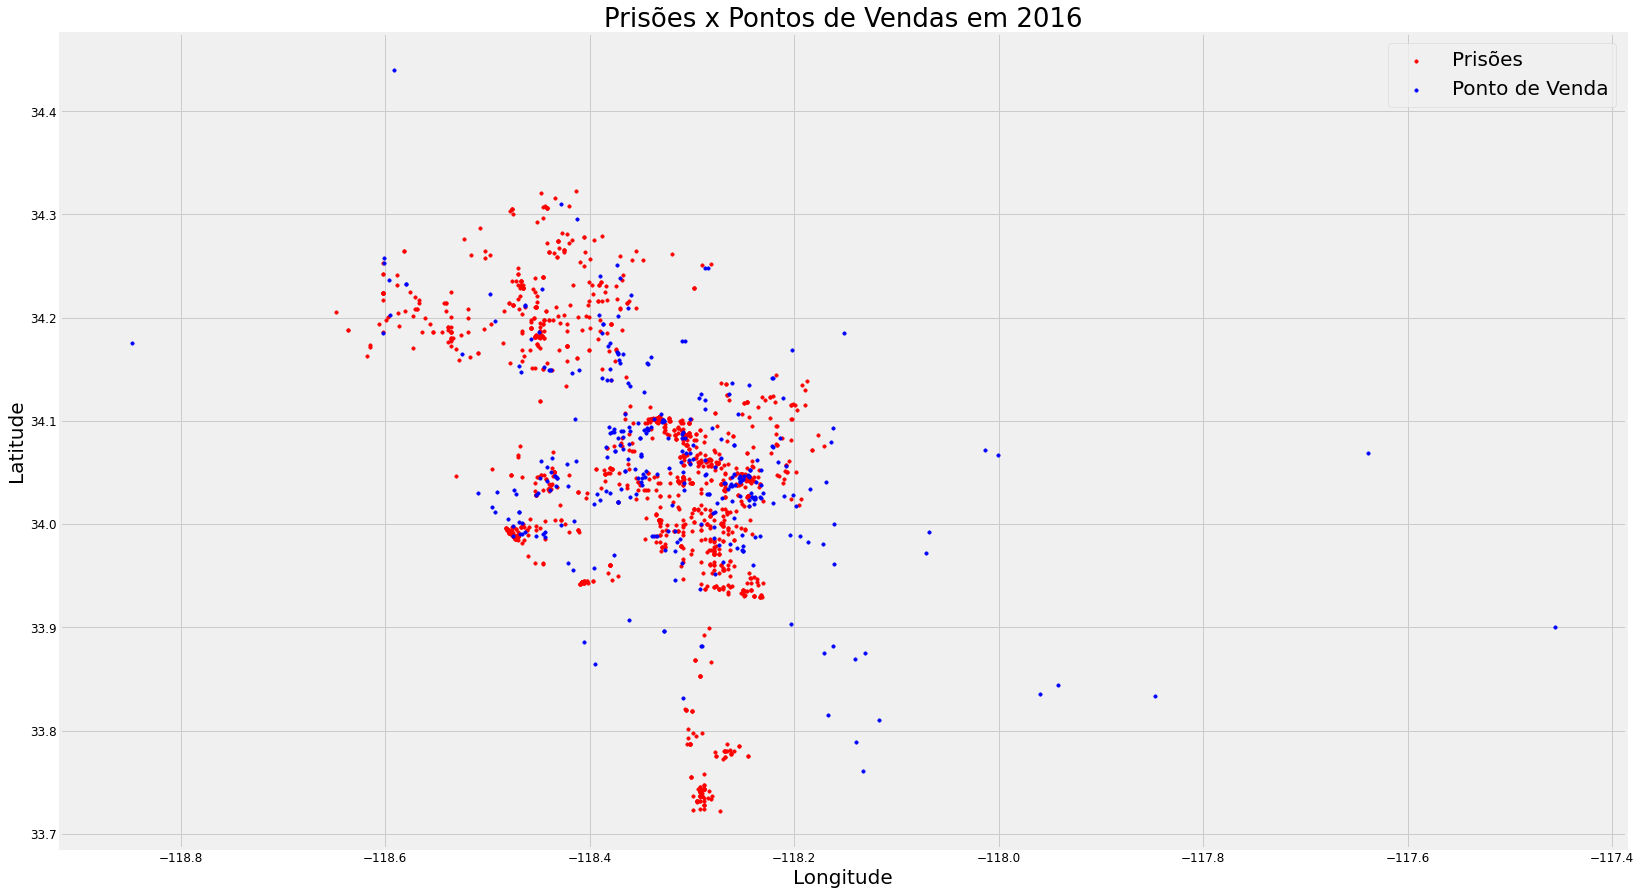

In [41]:
# Graph of Prisons x Sales Points in 2016
# Red prisons
# Sales points in blue
grafico_prisoes_lojas(df_prisoes_2016, 2016)

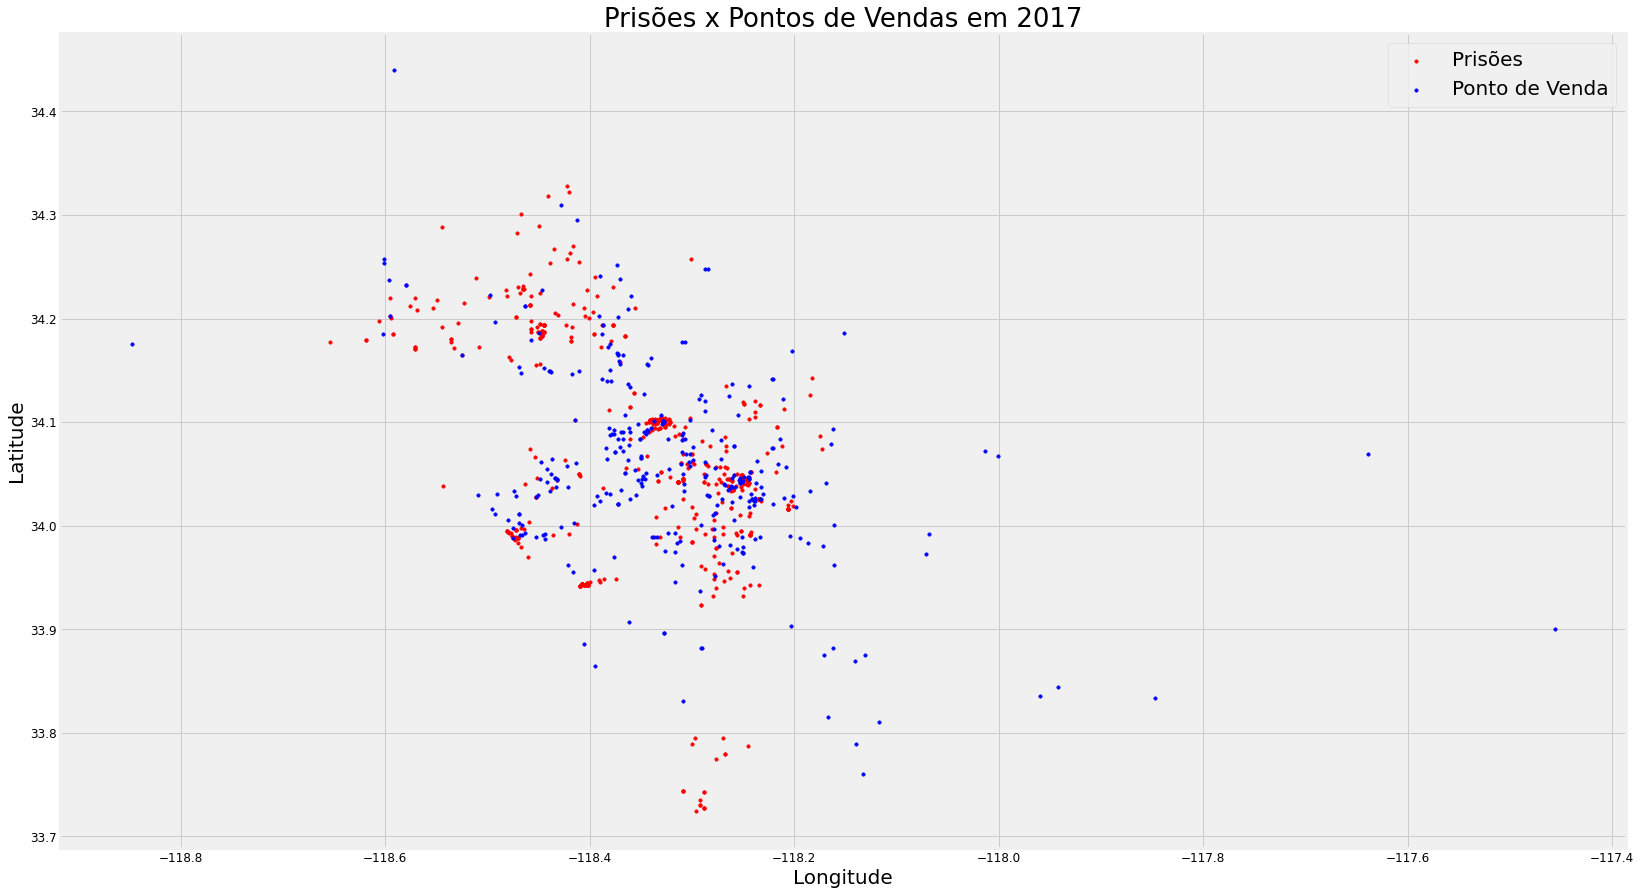

In [42]:
# Graph of Prisons x Sales Points in 2017
# Red prisons
# Sales points in blue
grafico_prisoes_lojas(df_prisoes_2017, 2017)

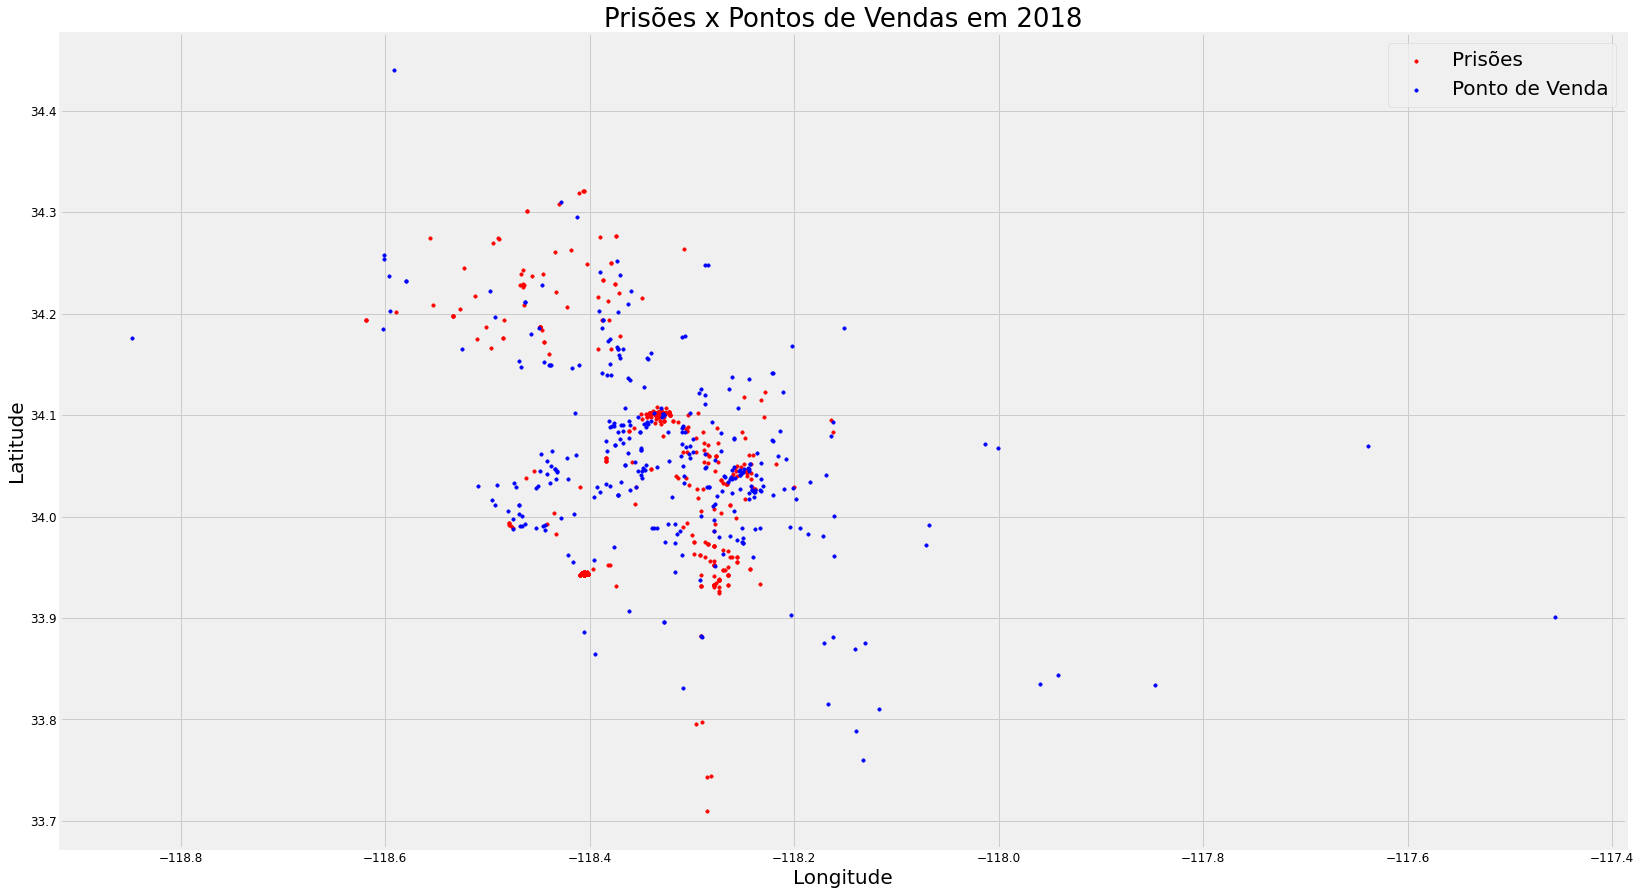

In [43]:
# Graph of Prisons x Sales Points in 2018
# Red prisons
# Sales points in blue
grafico_prisoes_lojas(df_prisoes_2018, 2018)

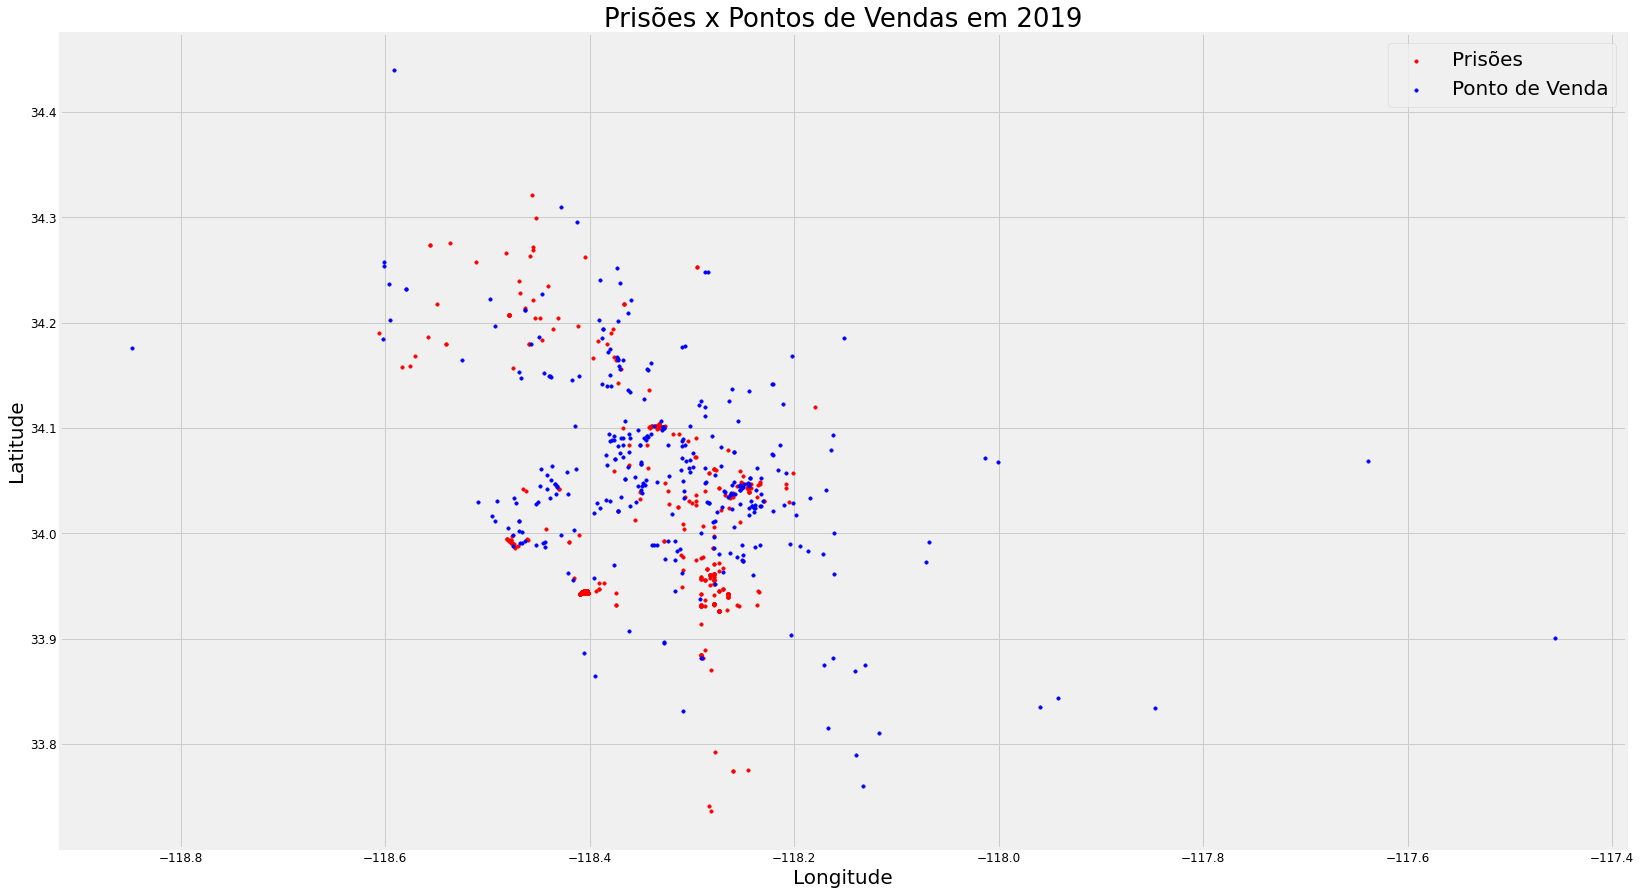

In [44]:
# Graph of Prisons x Sales Points in 2019
# Red prisons
# Sales points in blue
grafico_prisoes_lojas(df_prisoes_2019, 2019)

As prisões foram concentradas em uma região da cidade e claramente próximas a pontos de vendas, antes e depois da legalização da maconha. As lojas não mudaram de lugar e ao longo dos anos mais lojas surgiram. Se houve redução do volume de prisões, isso deve-se provavelmente à legalização da maconha.

E com relação às escolas? Vamos checar.

### Prisões Associadas à Maconha e Que Ocorreram Próximo a Escolas

In [45]:
# Loading de Dataset
df_escolas = pd.read_csv('dados/df_escolas.csv')

In [46]:
#Shape
df_escolas.shape

(947, 7)

In [47]:
# Data
df_escolas.head()

,Unnamed: 0,School,Zip Code,Grades,Local District,Board District,complete_address
0,0,Frank Del Olmo Elementary,90004,K- 5,C,2-Monica Garcia,100 N New Hampshire Ave Los Angeles CA 90004
1,1,10th Street Elementary,90015,1- 5,C,2-Monica Garcia,1000 Grattan St Los Angeles CA 90015
2,2,Elementary Community Day School,91311,K- 6,XS,3-Scott M Schmerelson,10001 Jumilla Ave Chatsworth CA 91311
3,3,Cesar E Chavez Learning Academy - Arts/Theatre...,91340,9-12,NE,6-Kelly Gonez,1001 Arroyo Ave San Fernando CA 91340
4,4,San Pedro Senior High Gifted STEAM Magnet,90731,9-12,S,7-Dr Richard A Vladovic,1001 W 15th St San Pedro CA 90731


Opa...parece que temos um pequeno problema aqui. Precisamos da latitude e longitude para poder criar os gráficos, mas temos apenas o endereço completo. Como resolveremos isso?

Com **Geolocalização**. Precisamos da latitude e longitude e temos apenas o endereço completo. Ok, vamos inverter. A partir do endereço, buscaremos latitude e longitude. Como? Com a ajuda do Google Maps.

In [49]:
# Install Package
!pip install -q  googlemaps

In [52]:
# Loading Package
import googlemaps

In [54]:
# Version of packages used in this jupyter notebook
%reload_ext watermark
%watermark -a "Rodolfo Terra - Ciência de Dados" --iversions

Author: Rodolfo Terra - Ciência de Dados

matplotlib: 3.3.2
pandas    : 1.1.3
googlemaps: 4.4.2
sys       : 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
scipy     : 1.5.2



In [58]:
# Here we define the API (put your key)
gmaps_key = googlemaps.Client(key = 'XXXXXXXX')

In [59]:
# Lists for receiving data
lista_latitude = []
lista_longitude = []

Evite executar esta célula abaixo muitas vezes para não bater o limite de requisições do Google Maps. Execute uma vez, faça os ajustes conforme mostrado nas células seguintes e salve o dataframe em disco.

In [62]:
# Loop through school addresses (this cell can take a long time to execute)
for address in df_escolas['complete_address']:
    
    # Get the geocode of the address 
    g = gmaps_key.geocode(address)
    
    # Collect latitude and longitude data
    # In case of error, assing NaN
    try:
        lat = g[0]['geometry']['location']['lat']
        lng = g[0]['geometry']['location']['lng']
    except:
        lat = np.NaN
        lng = np.NaN
    
    # Write to lists
    lista_latitude.append(lat)
    lista_longitude.append(lng)

In [ ]:
# Now we add the columns to the dataframe
df_escolas['latitude'] = lista_latitude
df_escolas['longitude'] = lista_longitude

In [76]:
df_escolas = df_escolas[['School', 'Zip Code', 'Grades', 'Local District', 'Board District',
       'complete_address', 'latitude', 'longitude']]

In [77]:
# We chack if missing values were generated
df_escolas.isnull().sum()

School              0
Zip Code            0
Grades              0
Local District      0
Board District      0
complete_address    0
latitude            0
longitude           0
dtype: int64

In [78]:
# Dados
df_escolas.head()

,School,Zip Code,Grades,Local District,Board District,complete_address,latitude,longitude
0,Frank Del Olmo Elementary,90004,K- 5,C,2-Monica Garcia,100 N New Hampshire Ave Los Angeles CA 90004,34.072925,-118.292591
1,10th Street Elementary,90015,1- 5,C,2-Monica Garcia,1000 Grattan St Los Angeles CA 90015,34.048284,-118.273264
2,Elementary Community Day School,91311,K- 6,XS,3-Scott M Schmerelson,10001 Jumilla Ave Chatsworth CA 91311,34.251825,-118.563377
3,Cesar E Chavez Learning Academy - Arts/Theatre...,91340,9-12,NE,6-Kelly Gonez,1001 Arroyo Ave San Fernando CA 91340,34.288514,-118.421011
4,San Pedro Senior High Gifted STEAM Magnet,90731,9-12,S,7-Dr Richard A Vladovic,1001 W 15th St San Pedro CA 90731,33.730370,-118.299342


In [79]:
# We created a column called coordinates concatenating latitude and longitude
# This column will provide more accurate information than the address which may contain typos
df_escolas['coordenadas'] = df_escolas['latitude'].astype(str) + ', ' + df_escolas['longitude'].astype(str)

In [80]:
# Dados
df_escolas.head()

,School,Zip Code,Grades,Local District,Board District,complete_address,latitude,longitude,coordenadas
0,Frank Del Olmo Elementary,90004,K- 5,C,2-Monica Garcia,100 N New Hampshire Ave Los Angeles CA 90004,34.072925,-118.292591,"34.072925, -118.292591"
1,10th Street Elementary,90015,1- 5,C,2-Monica Garcia,1000 Grattan St Los Angeles CA 90015,34.048284,-118.273264,"34.0482844, -118.27326399999998"
2,Elementary Community Day School,91311,K- 6,XS,3-Scott M Schmerelson,10001 Jumilla Ave Chatsworth CA 91311,34.251825,-118.563377,"34.2518249, -118.5633769"
3,Cesar E Chavez Learning Academy - Arts/Theatre...,91340,9-12,NE,6-Kelly Gonez,1001 Arroyo Ave San Fernando CA 91340,34.288514,-118.421011,"34.2885136, -118.421011"
4,San Pedro Senior High Gifted STEAM Magnet,90731,9-12,S,7-Dr Richard A Vladovic,1001 W 15th St San Pedro CA 90731,33.730370,-118.299342,"33.73037, -118.2993419"


Agora vamos remover escolas duplicadas com base em suas coordenadas (coluna **coordenadas**).

In [81]:
# Removes duplicate records based on coordinates
df_escolas = df_escolas[~df_escolas.duplicated(subset = 'coordenadas')]

In [82]:
# Index reset, as records have been removed
df_escolas.reset_index(drop = True, inplace = True)

In [83]:
# Shape
df_escolas.shape

(914, 9)

Algumas células acima o shape era de 947 registros. A mesma escola estava cadastrada mais de uma vez, por conta de erros de digitação no endereço.

In [84]:
# Statistical Summary
df_escolas.describe()

,Zip Code,latitude,longitude
count,914.000000,914.000000,914.000000
mean,90480.658643,34.061014,-118.335166
std,589.620105,0.128477,0.116344
min,90001.000000,33.711431,-118.654393
25%,90026.000000,33.981266,-118.424024
50%,90063.000000,34.044842,-118.299211
75%,91307.000000,34.170331,-118.251716
max,91754.000000,34.319027,-118.152239


In [85]:
# Save the file to disk (now without saving the index)
df_escolas.to_csv('dados/df_escolas_parte2.csv', index = False)

In [87]:
# data
df_escolas.head()

,School,Zip Code,Grades,Local District,Board District,complete_address,latitude,longitude,coordenadas
0,Frank Del Olmo Elementary,90004,K- 5,C,2-Monica Garcia,100 N New Hampshire Ave Los Angeles CA 90004,34.072925,-118.292591,"34.072925, -118.292591"
1,10th Street Elementary,90015,1- 5,C,2-Monica Garcia,1000 Grattan St Los Angeles CA 90015,34.048284,-118.273264,"34.0482844, -118.27326399999998"
2,Elementary Community Day School,91311,K- 6,XS,3-Scott M Schmerelson,10001 Jumilla Ave Chatsworth CA 91311,34.251825,-118.563377,"34.2518249, -118.5633769"
3,Cesar E Chavez Learning Academy - Arts/Theatre...,91340,9-12,NE,6-Kelly Gonez,1001 Arroyo Ave San Fernando CA 91340,34.288514,-118.421011,"34.2885136, -118.421011"
4,San Pedro Senior High Gifted STEAM Magnet,90731,9-12,S,7-Dr Richard A Vladovic,1001 W 15th St San Pedro CA 90731,33.730370,-118.299342,"33.73037, -118.2993419"


In [89]:
# Function for the graphs of arrests that occurred near schools
def grafico_prisoes_escolas(dataframe_prisoes, ano):
    
    # We define the plot ares
    fig, ax = plt.subplots(figsize = (25,15))
    
    # First layer of the chart
    plt.scatter(dataframe_prisoes['longitude'], dataframe_prisoes['latitude'], color = 'r', label = 'Prisões', s = 12)
    
    # Second layer of the chart
    ax.scatter(df_escolas['longitude'], df_escolas['latitude'], color = 'g', label = "cscolas", s = 12)
    
    plt.title(f'Prisões x Escolas em {ano}', fontsize = 26)
    plt.xlabel("Longitude", fontsize = 20)
    plt.ylabel("Latitude", fontsize = 20)
    ax.legend(fontsize = 20)

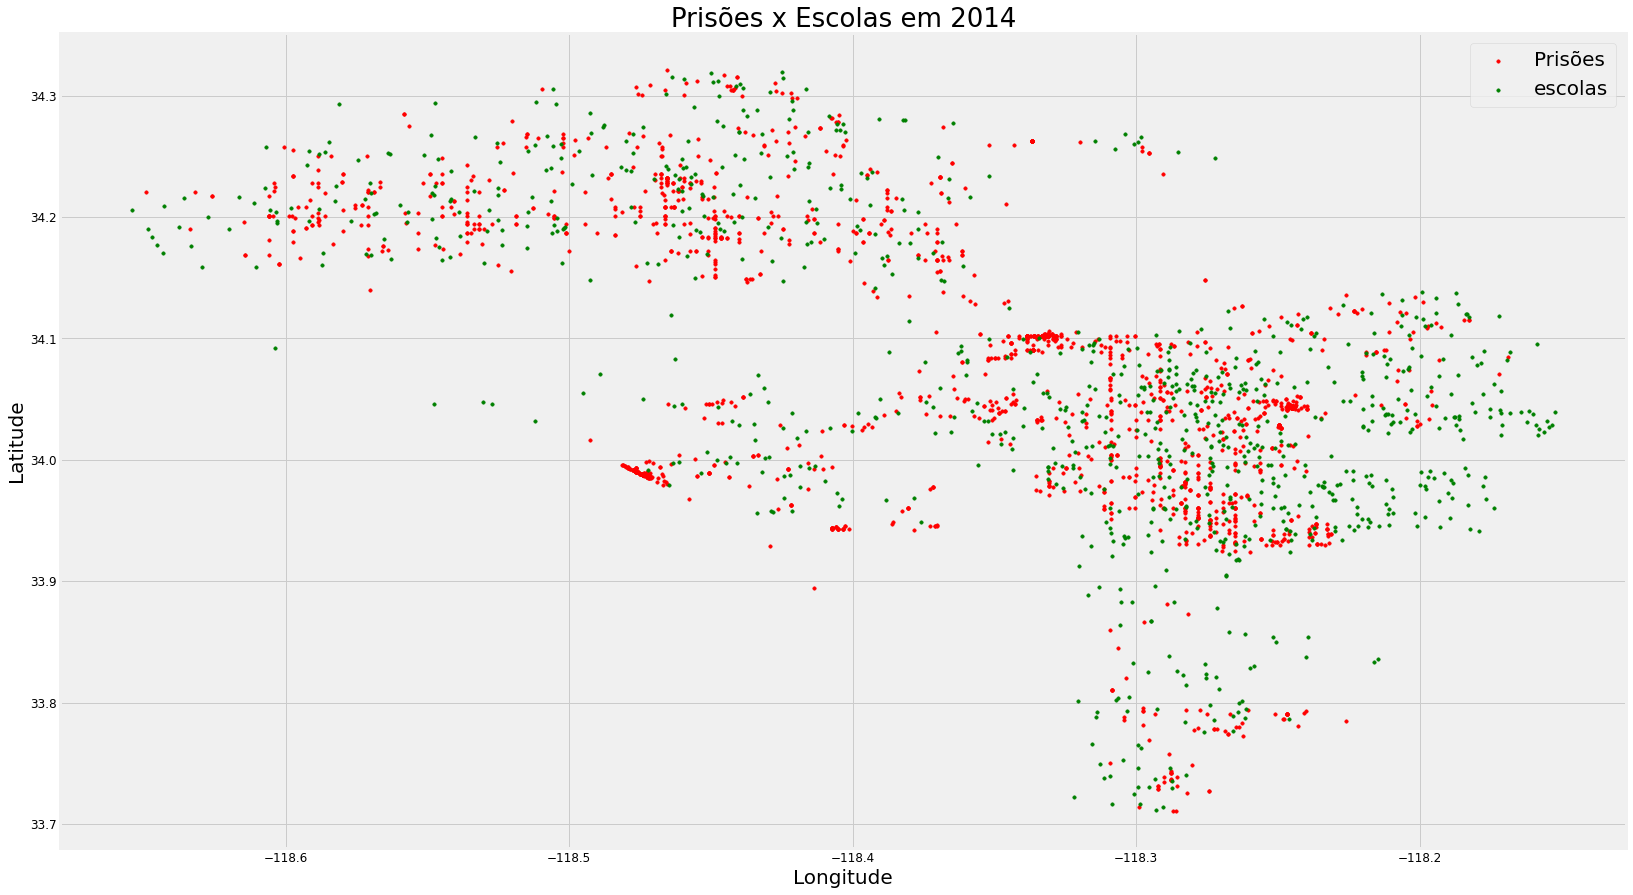

In [95]:
# Gráfico de Prisões x Escolas em 2014
# Prisões em vermelho
# Pontos de vendas em verde
grafico_prisoes_escolas(df_prisoes_2014, 2014)

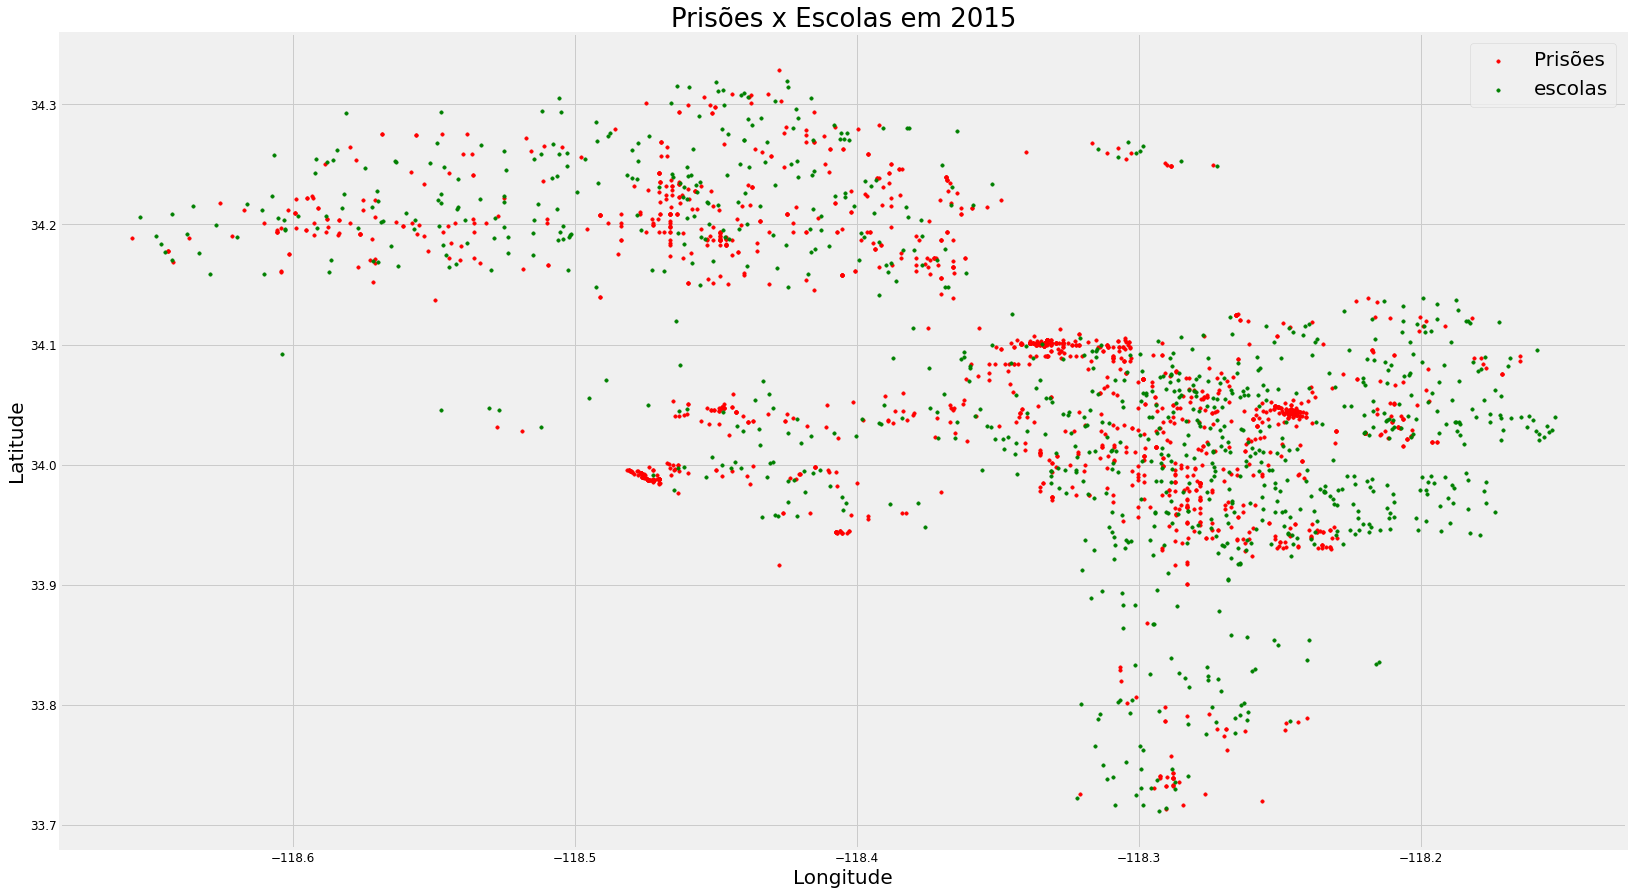

In [96]:
# Gráfico de Prisões x Escolas em 2015
# Prisões em vermelho
# Pontos de vendas em verde
grafico_prisoes_escolas(df_prisoes_2015, 2015)

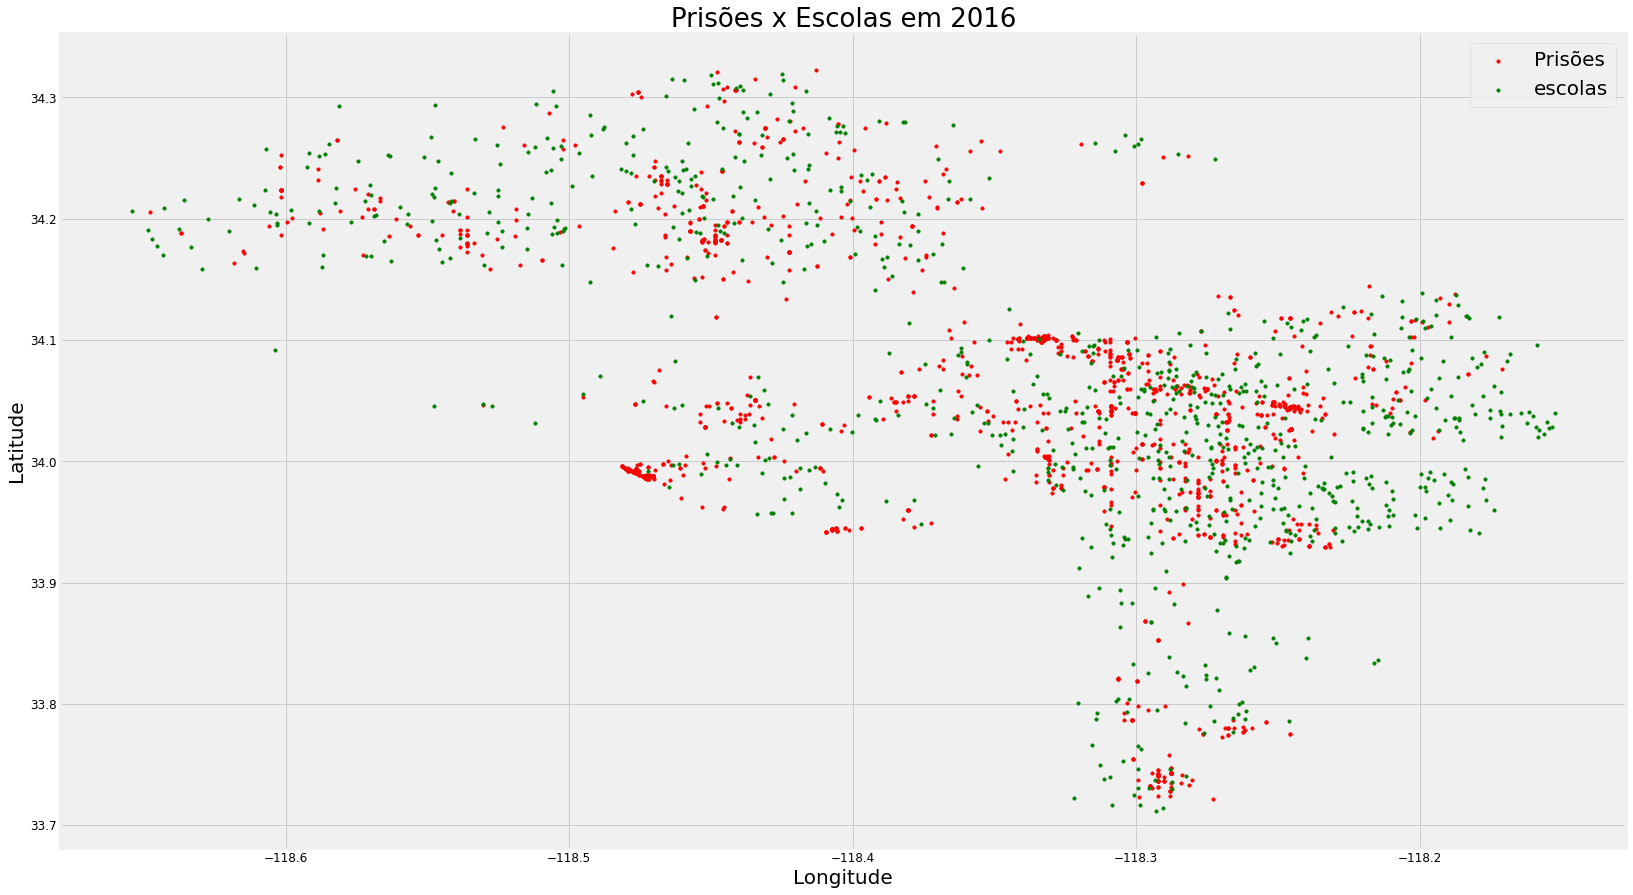

In [97]:
# Gráfico de Prisões x Escolas em 2016
# Prisões em vermelho
# Pontos de vendas em verde
grafico_prisoes_escolas(df_prisoes_2016, 2016)

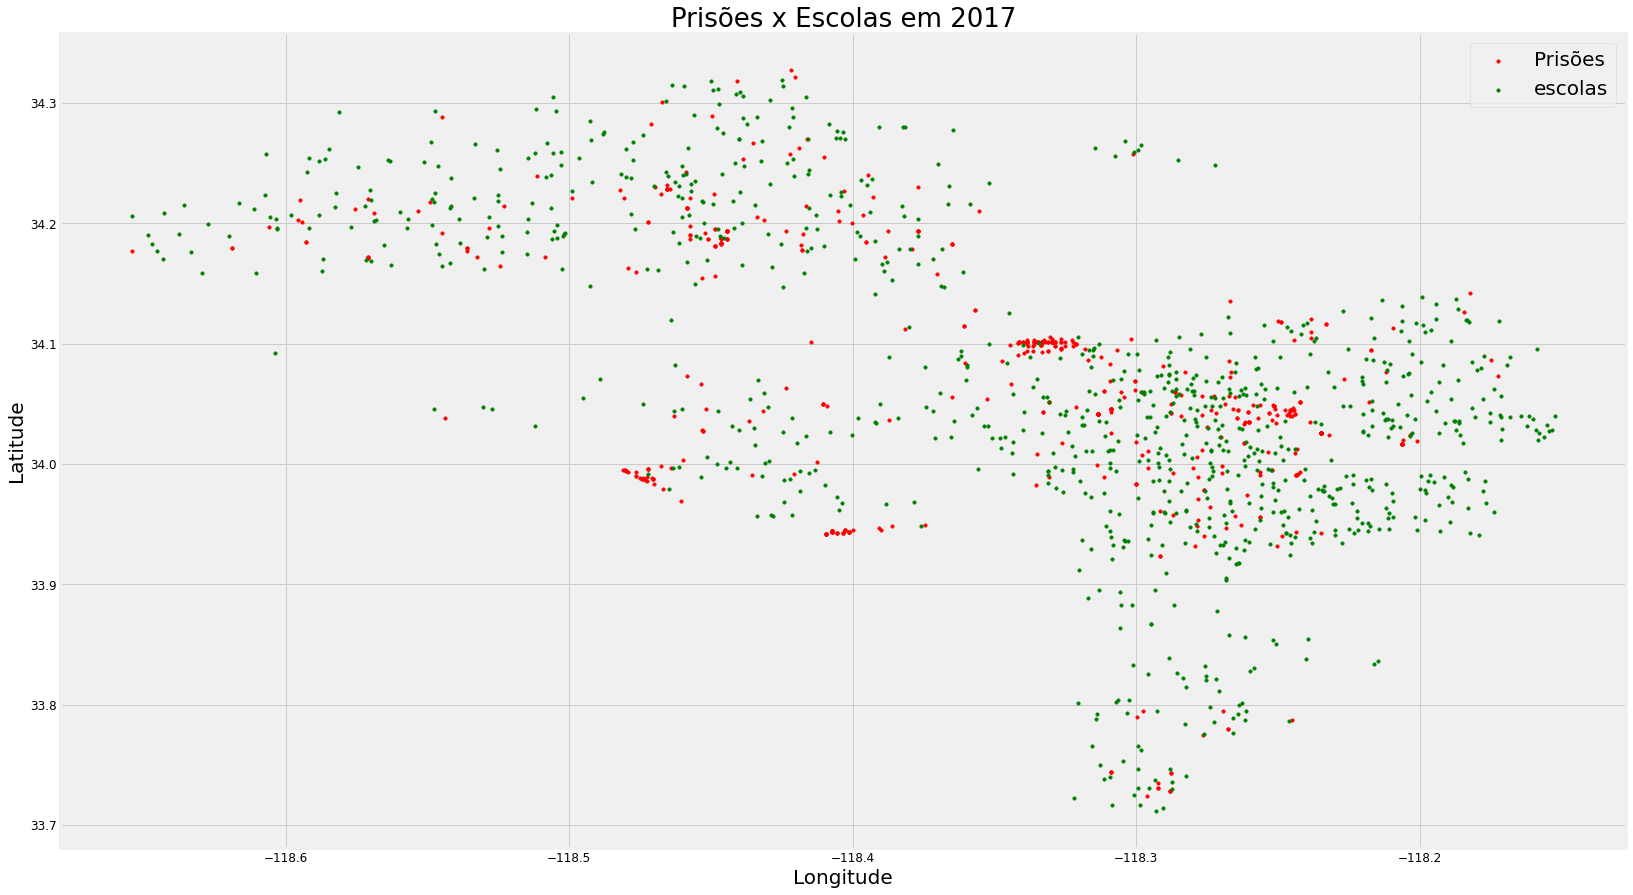

In [98]:
# Gráfico de Prisões x Escolas em 2017
# Prisões em vermelho
# Pontos de vendas em verde
grafico_prisoes_escolas(df_prisoes_2017, 2017)

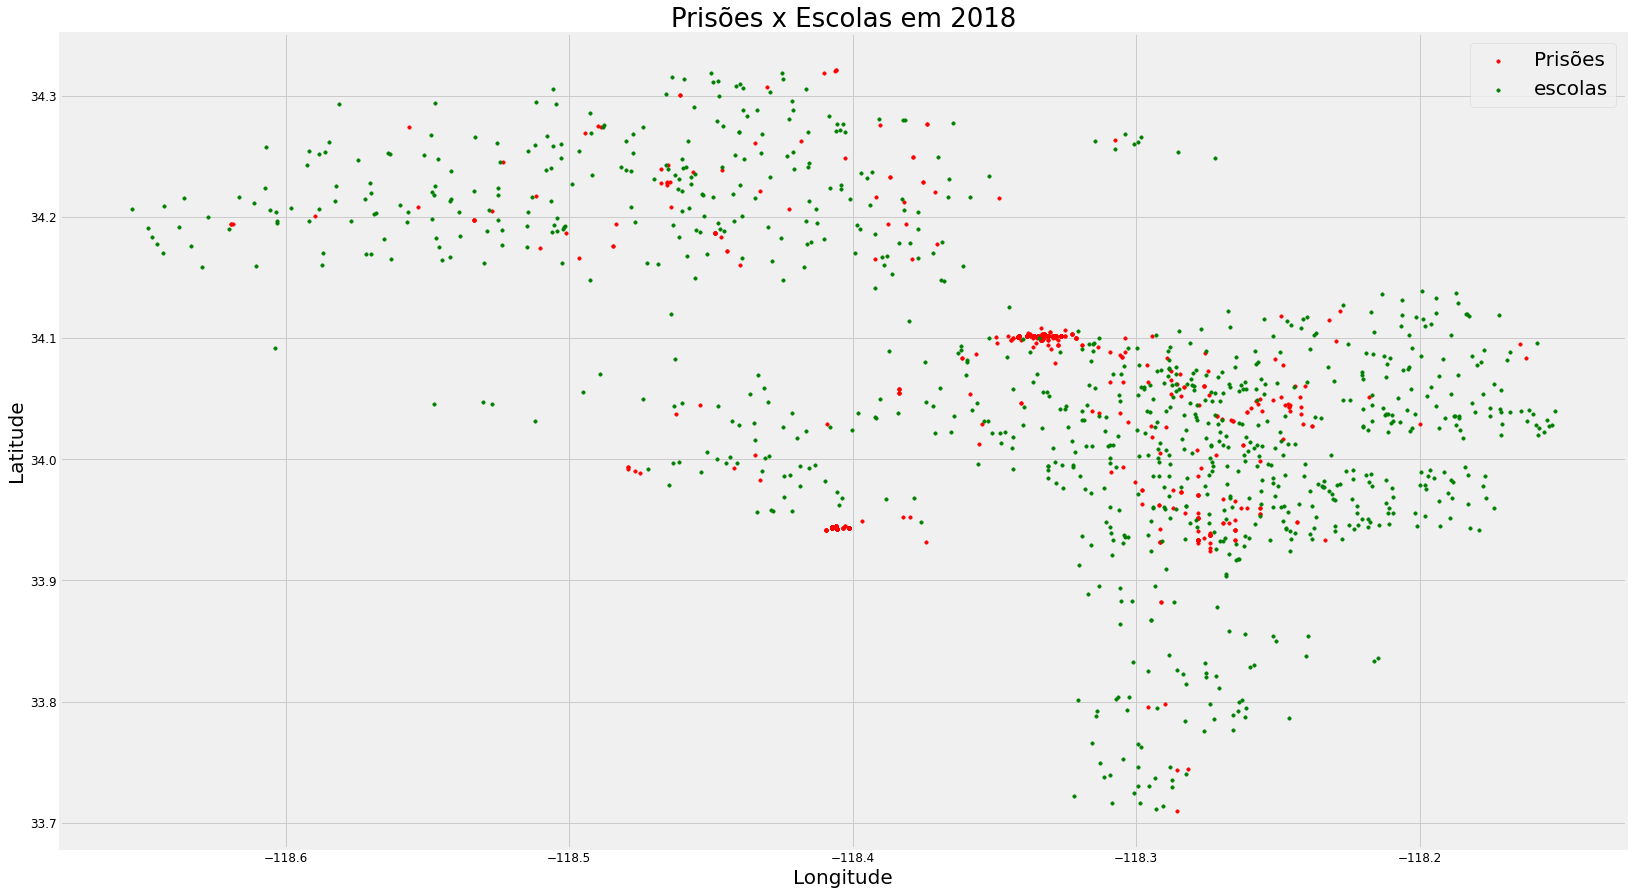

In [99]:
# Gráfico de Prisões x Escolas em 2018
# Prisões em vermelho
# Pontos de vendas em verde
grafico_prisoes_escolas(df_prisoes_2018, 2018)

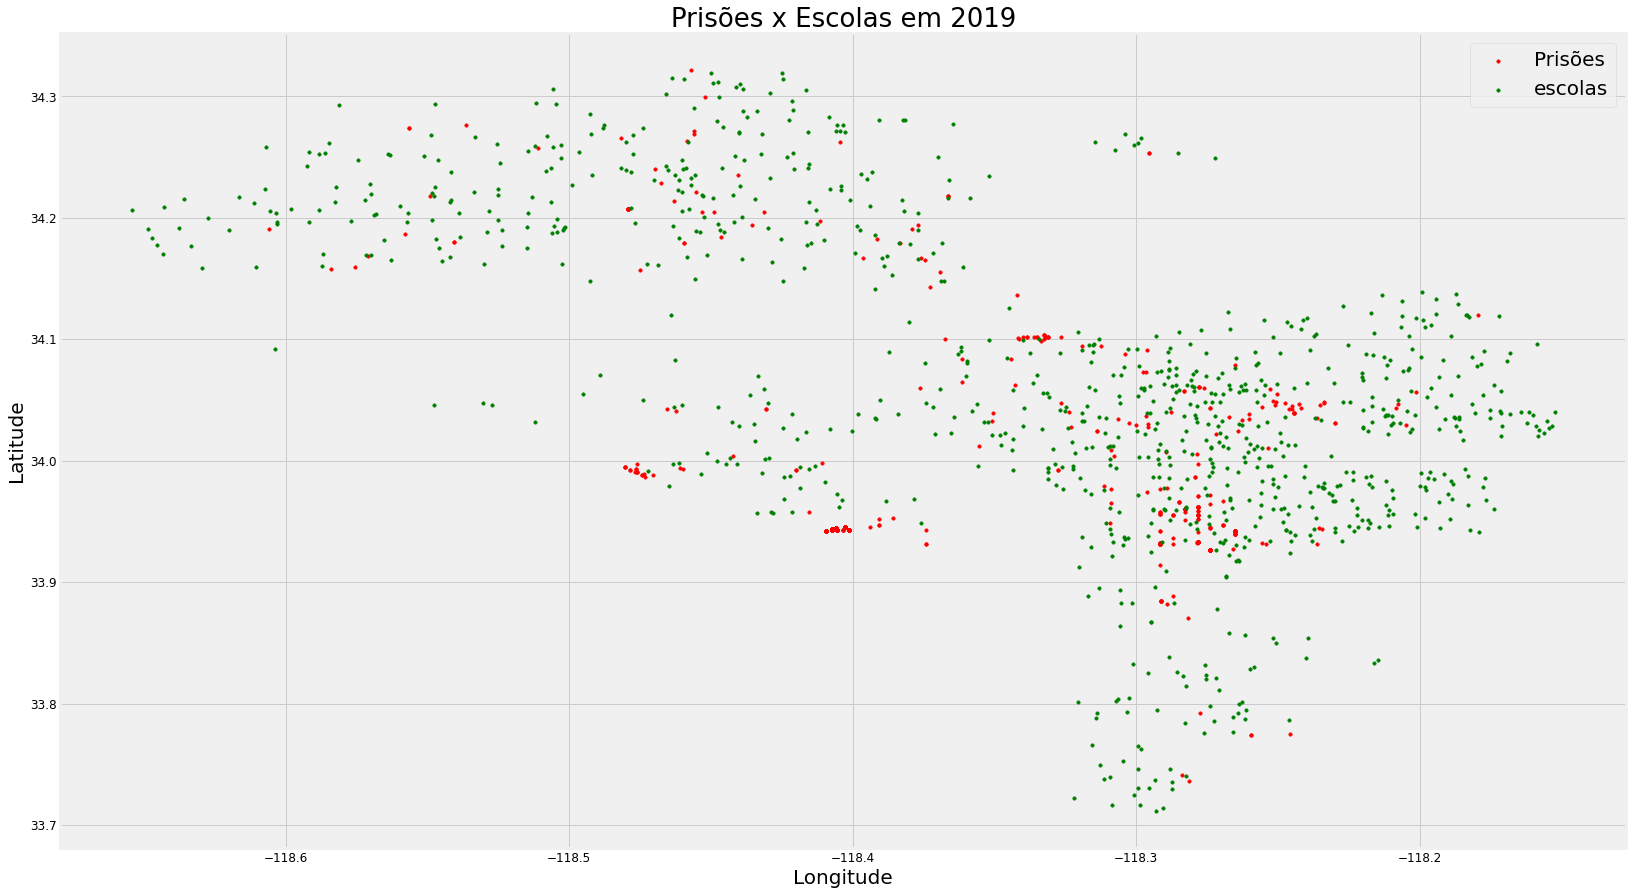

In [100]:
# Gráfico de Prisões x Escolas em 2019
# Prisões em vermelho
# Pontos de vendas em verde
grafico_prisoes_escolas(df_prisoes_2019, 2019)

Fica claro que as prisões ocorreram por diversas regiões, em localidades próximas ou não a escolas. Para informação mais precisa, teremos que calcular as distâncias entre cada prisão e os pontos de venda e escolas. O pacote geopy será útil para essa tarefa.

## Distâncias Entre Locais Que Ocorreram Prisões e Pontos de Vendas e Escolas

Sem essa informação, teríamos apenas os gráficos acima. Visualmente temos apenas uma ideia geral. Precisamos de dados reais de distância. É o que faremos agora.

#### Distância Entre Locais Que Ocorreram Prisões e Pontos (Legalizados) de Venda de Maconha

Começaremos com o cálculo de distância entre cada prisão e cada ponto de venda. Com Geolocalização conseguimos extrair dados e padrões de forma bem mais precisa, não acha?

In [101]:
# We created a dataframe top use in calculating distances
df_lojas_dist = df_lojas[['name','latitude','longitude']]

In [102]:
# Shape
df_lojas_dist.shape

(326, 3)

In [103]:
# Data 
df_lojas_dist.head(3)

,name,latitude,longitude
0,California Caregivers Alliance,34.08235,-118.272037
1,Herbarium,34.08853,-118.344600
2,MedMen Los Angeles - DTLA,34.04460,-118.254440


In [129]:
# We create a dataframe to use in calculating distances
df_prisoes_dist = df_prisoes[['Report ID','latitude','longitude']]

In [130]:
# Index reset (organizer the index on the new dataframe)
df_prisoes_dist.reset_index(drop = True, inplace = True)

In [131]:
# Shape
df_prisoes_dist.shape

(6226, 3)

In [132]:
# Data
df_prisoes_dist.head(3)

,Report ID,latitude,longitude
0,5568617,34.1016,-118.3350
1,5568629,34.1016,-118.3350
2,5607178,34.0838,-118.3614


Para calcular a distância entre as coordenadas precisamos da função geodesic() do pacote geopy.

In [133]:
# Imports
import geopy
from geopy.distance import geodesic

In [134]:
# Version of packages used in this jupyter notebook
%reload_ext watermark
%watermark -a "Rodolfo Terra - Ciência de Dados" --iversions

Author: Rodolfo Terra - Ciência de Dados

geopy     : 2.1.0
matplotlib: 3.3.2
pandas    : 1.1.3
googlemaps: 4.4.2
sys       : 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
scipy     : 1.5.2



In [135]:
# This function will calculate the distance between the coordinates of each prision and each point pf sale
def calcula_distancia(loja_lat, loja_long, prisao_lat, prisao_long):
    
    # Point of sales coordinates
    coord_loja = (loja_lat, loja_long)
    
    # Prison coordinates
    coord_prisao = (prisao_lat, prisao_long)
    
    # Calculates the distance with geopy package funciton
    #The calculation will be in miles, it is the standard in the USA
    try:
        distancia = geodesic(coord_loja, coord_prisao).miles
        return distancia
    except:
        pass

Agora aplicamos a função.

Loop para o cálculo da distância de pontos de vendas para locais de prisões (a execução da célula abaixo é demorada)

In [136]:
%%time

# For each point of sales name calculates the distance to all prisons
for loja_name, position in zip(list(df_lojas_dist['name'].values), range(len(df_lojas_dist))):
    
    # We created a list of distances
    distance_list = []
    
    # For every prison in the prison dataframe
    for prisao in range(len(df_prisoes_dist)):
        
        # Assign values to variables
        loja_lat = df_lojas_dist[df_lojas_dist['name'] == loja_name]['latitude'].values
        loja_long = df_lojas_dist[df_lojas_dist['name'] == loja_name]['longitude'].values
        prisao_lat = df_prisoes_dist['latitude'][prisao]
        prisao_long = df_prisoes_dist['longitude'][prisao]
        
        # Calculates the distance with the function created in the previous cell
        distance = calcula_distancia(loja_lat, loja_long, prisao_lat, prisao_long)
        
        # Append the distance to the distance list
        distance_list.append(distance)
        
    # We added the list of distance to the prison dataframe
    df_prisoes_dist[loja_name] = distance_list

Wall time: 44min 38s


In [137]:
# Data
df_prisoes_dist.head()

,Report ID,latitude,longitude,California Caregivers Alliance,Herbarium,MedMen Los Angeles - DTLA,HERB,Extra Special Delivery,Cannabis Cafe,Kushfly,...,Real Monster Delivery,Khonsu's Collective,Cannacureshop,Charisma Club 420,The Syndicate,Level Up 25 Cap,Rolling Up Delivery Services,The Blue Diamond Center,Reefer Madness Clone Company,McLeonel dispensary
0,5568617,34.1016,-118.3350,3.846579,1.055725,6.065042,6.300019,5.022374,0.818004,1.914766,...,19.343525,0.119404,1.549481,40.007556,9.736950,7.785832,18.565526,3.720157,33.563909,52.333731
1,5568629,34.1016,-118.3350,3.846579,1.055725,6.065042,6.300019,5.022374,0.818004,1.914766,...,19.343525,0.119404,1.549481,40.007556,9.736950,7.785832,18.565526,3.720157,33.563909,52.333731
2,5607178,34.0838,-118.3614,5.125880,1.017099,6.704001,6.956954,5.777352,1.150360,3.135336,...,20.745703,1.855468,0.600893,41.475405,9.860692,6.684340,19.985302,5.030097,34.207656,53.499184
3,5616516,33.9428,-118.4054,12.292510,10.633230,11.150758,11.293960,15.559937,10.907618,13.176048,...,24.788895,11.623553,10.185298,44.874851,10.388914,4.967542,24.205989,15.068000,32.966616,54.636803
4,5616188,34.1667,-118.3965,9.203280,6.154616,11.711705,11.935715,1.309876,5.910492,3.924004,...,23.727789,5.635323,6.305098,43.972866,15.442157,12.710072,22.921525,3.165782,39.014091,57.007198


Agora vamos criar duas colunas, loja_0.5_milha e loja_1_milha, que contarão o número de pontos de vendas que estão dentro de 0,5 milhas e 1 milha respectivamente para cada prisão.

In [138]:
# Create the Dataframe
df_prisao_dist_loja = df_prisoes_dist.drop(['Report ID', 'latitude', 'longitude'], axis = 1).T

In [139]:
# Data
df_prisao_dist_loja.head(3)

,0,1,2,3,4,5,6,7,8,9,...,6216,6217,6218,6219,6220,6221,6222,6223,6224,6225
California Caregivers Alliance,3.84658,3.84658,5.12588,12.2925,9.20328,12.3303,12.2925,12.2964,12.1255,12.4831,...,12.2925,12.1283,12.1976,12.1976,17.877,6.98375,6.98375,12.1255,12.4831,3.11662
Herbarium,1.05572,1.05572,1.0171,10.6332,6.15462,10.6351,10.6332,10.5917,10.5321,10.7645,...,10.6332,8.9468,10.5062,10.5062,13.9541,6.71076,6.71076,10.5321,10.7645,5.95126
MedMen Los Angeles - DTLA,6.06504,6.06504,6.704,11.1508,11.7117,11.2097,11.1508,11.1842,10.9512,11.3689,...,11.1508,14.6248,11.0827,11.0827,19.9457,5.53844,5.53844,10.9512,11.3689,0.554649


In [141]:
# For each prison we calculate the total points of sale within a radius of 0.5 miles or less
# And we created a column on the df_prisoes_dist dataframe
df_prisoes_dist['loja_0.5_milha'] = (df_prisao_dist_loja < 0.5).sum()

In [142]:
# For each prison we calculate the total points of sale within a radius of 1 mile or less
# And we created a column on the df_prisoes_dist dataframe
df_prisoes_dist['loja_1_milha'] = (df_prisao_dist_loja < 1).sum()

Let's add the two columns created, in the prison dataset. But first we have to check if the Report ID column is the same in both dataframes.

In [144]:
# The Report ID column must be the same in both dataframes. Let's check.
len(df_prisoes_dist['Report ID'].unique()) == len(df_prisoes['Report ID'].unique())

True

In [145]:
# And then we Merge
df_prisoes = df_prisoes.merge(df_prisoes_dist[['Report ID', 'loja_0.5_milha', 'loja_1_milha']], 
                              left_on = 'Report ID', 
                              right_on = 'Report ID')

In [147]:
# Data
df_prisoes.head(3)

,Unnamed: 0,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Charge,Charge Description,Address,Cross Street,Location,latitude,longitude,marijuana_related,loja_0.5_milha,loja_1_milha
0,340,5568617,2019-03-09,2015.0,6,Hollywood,646,29,M,O,...,11359HS,possession marijuana for sale,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,8,12
1,342,5568629,2019-03-09,2015.0,6,Hollywood,646,25,M,B,...,11359HS,possession marijuana for sale,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,8,12
2,983,5607178,2019-04-21,2115.0,7,Wilshire,702,42,M,B,...,11359(D)HS,poss/sale marij ovr 21 employ per 20/belw,MELROSE AV,FAIRFAX AV,"['34.0838', '-118.3614']",34.0838,-118.3614,poss/sale marij ovr 21 employ per 20/belw,3,13


É uma boa ideia salvar o dataframe em disco. Antes, vamos remover a coluna "Unnamed: 0", pois ela é o índice que foi salvo no arquivo csv na Parte 1.

In [149]:
# We don't need this column anymore
df_prisoes = df_prisoes.drop('Unnamed: 0',1)

In [150]:
# Save the file to disk (now without saving the index)
df_prisoes.to_csv('dados/df_prisoes_parte2.csv', index = False)

#### Distância Entre Locais Que Ocorreram Prisões e Escolas

Repetimos o procesos anterior para as escolas.

In [151]:
# Dataframe to calculate distances
df_escolas_dist = df_escolas[['School', 'latitude', 'longitude']]

In [152]:
# shape
df_escolas_dist.shape

(914, 3)

In [153]:
# Data
df_escolas_dist.head()

,School,latitude,longitude
0,Frank Del Olmo Elementary,34.072925,-118.292591
1,10th Street Elementary,34.048284,-118.273264
2,Elementary Community Day School,34.251825,-118.563377
3,Cesar E Chavez Learning Academy - Arts/Theatre...,34.288514,-118.421011
4,San Pedro Senior High Gifted STEAM Magnet,33.730370,-118.299342


In [154]:
# Dataframe to calculate distances
df_prisoes_dist_escola = df_prisoes[['Report ID', 'latitude', 'longitude']]

In [155]:
# Index Reset
df_prisoes_dist_escola.reset_index(drop = True, inplace = True)

In [157]:
# Data
df_prisoes_dist_escola.head()

,Report ID,latitude,longitude
0,5568617,34.1016,-118.3350
1,5568629,34.1016,-118.3350
2,5607178,34.0838,-118.3614
3,5616516,33.9428,-118.4054
4,5616188,34.1667,-118.3965


Loop para cálculo das distâncias entre prisões e escolas (a execução da célula abaixo é demorada).

In [158]:
%%time
for escola_name, position in zip(list(df_escolas_dist['School'].values), range(len(df_escolas_dist))):

    # List of distance
    distance_list = []

    # Loop through prisons
    for prisao in range(len(df_prisoes_dist_escola)):
        
        # Assign values to variables
        loja_lat2 = df_escolas_dist[df_escolas_dist['School'] == escola_name]['latitude'].values
        loja_long2 = df_escolas_dist[df_escolas_dist['School'] == escola_name]['longitude'].values
        prisao_lat2 = df_prisoes_dist_escola['latitude'][prisao]
        prisao_long2 = df_prisoes_dist_escola['longitude'][prisao]
        
        # Calculates the distance with the function created in the previous cell
        distance = calcula_distancia(loja_lat2, loja_long2, prisao_lat2, prisao_long2)
    
        # Append to list of distances
        distance_list.append(distance)

    df_prisoes_dist_escola[escola_name] = distance_list

Wall time: 2h


In [159]:
# Shape
df_prisoes_dist_escola.shape

(6226, 917)

In [160]:
# Data
df_prisoes_dist_escola.head()

,Report ID,latitude,longitude,Frank Del Olmo Elementary,10th Street Elementary,Elementary Community Day School,Cesar E Chavez Learning Academy - Arts/Theatre/Entertain Mag,San Pedro Senior High Gifted STEAM Magnet,Normont Elementary,Stoney Point Continuation High,...,Hobart Boulevard Elementary DL Two-Way Im Spanish,San Miguel Elementary DL World Lang Im Mandarin,Wadsworth Avenue Elementary,Topeka Drive Charter for Advanced Studies,Madison Elementary,Stonehurst Avenue Elementary STEAM Magnet,Mariposa-Nabi Primary Center,99th Street Elementary,Pacoima Middle School,Alfred B Nobel Charter Middle School
0,5568617,34.1016,-118.3350,3.133832,5.103094,16.684527,13.792930,25.668208,21.289751,17.826477,...,3.729257,13.236804,7.709947,15.750312,12.776177,10.399451,3.923088,11.573941,11.407154,16.117688
1,5568629,34.1016,-118.3350,3.133832,5.103094,16.684527,13.792930,25.668208,21.289751,17.826477,...,3.729257,13.236804,7.709947,15.750312,12.776177,10.399451,3.923088,11.573941,11.407154,16.117688
2,5607178,34.0838,-118.3614,4.016920,5.617011,16.371597,14.517362,24.619110,20.310587,17.412544,...,3.815014,13.263019,7.807277,15.490766,12.713676,11.442783,4.147576,11.173228,11.987967,15.855267
3,5616516,33.9428,-118.4054,11.061959,10.507209,23.145724,23.845205,15.861012,12.087018,23.750521,...,9.509727,11.744628,9.601928,22.516597,10.966923,21.248529,9.743959,8.454320,21.194917,22.837359
4,5616188,34.1667,-118.3965,8.789582,10.795187,11.213558,8.512651,30.586771,26.320914,12.450224,...,9.388768,18.938786,13.409869,10.240029,18.465070,5.918080,9.613745,17.135759,5.939239,10.605115


In [161]:
# Transposed from the matrix (dataframe)
df_prisoes_dist_escola_T = df_prisoes_dist_escola[df_escolas_dist['School']].T

In [162]:
# Data
df_prisoes_dist_escola_T.head()

,0,1,2,3,4,5,6,7,8,9,...,6216,6217,6218,6219,6220,6221,6222,6223,6224,6225
Frank Del Olmo Elementary,3.133832,3.133832,4.016920,11.061959,8.789582,11.094973,11.061959,11.059560,10.903239,11.245559,...,11.061959,11.697257,10.961893,10.961893,17.092165,5.915487,5.915487,10.903239,11.245559,3.026553
10th Street Elementary,5.103094,5.103094,5.617011,10.507209,10.795187,10.558389,10.507209,10.529555,10.319182,10.716023,...,10.507209,13.691878,10.428453,10.428453,18.882616,4.966615,4.966615,10.319182,10.716023,1.018030
Elementary Community Day School,16.684527,16.684527,16.371597,23.145724,11.213558,23.073752,23.145724,23.027052,23.213462,23.105700,...,23.145724,8.331096,23.001286,23.001286,4.527672,22.425167,22.425167,23.213462,23.105700,22.769924
Cesar E Chavez Learning Academy - Arts/Theatre/Entertain Mag,13.792930,13.792930,14.517362,23.845205,8.512651,23.807112,23.845205,23.758702,23.827644,23.892658,...,23.845205,6.567819,23.699503,23.699503,10.533375,21.113545,21.113545,23.827644,23.892658,19.556443
San Pedro Senior High Gifted STEAM Magnet,25.668208,25.668208,24.619110,15.861012,30.586771,15.932844,15.861012,15.979518,15.797416,15.902609,...,15.861012,32.899236,16.005676,16.005676,34.753856,18.118955,18.118955,15.797416,15.902609,21.334833


In [163]:
# For each school we calculate the total number of arrests within 0.5 miles or less
# And we created a column in the df_escolas_dist dataframe
df_escolas_dist['prisao_0.5_milha'] = df_escolas_dist['School'].map((df_prisoes_dist_escola_T < 0.5).sum(1))

In [164]:
# For each prison we calculate the total points of sale within a radius of 0.5 miles or less
# And we created a column in the df_escolas_dist dataframe
df_escolas_dist['prisao_1_milha'] = df_escolas_dist['School'].map((df_prisoes_dist_escola_T < 1).sum(1))

In [165]:
# Dados
df_escolas_dist.head()

,School,latitude,longitude,prisao_0.5_milha,prisao_1_milha
0,Frank Del Olmo Elementary,34.072925,-118.292591,28,95
1,10th Street Elementary,34.048284,-118.273264,26,141
2,Elementary Community Day School,34.251825,-118.563377,1,3
3,Cesar E Chavez Learning Academy - Arts/Theatre...,34.288514,-118.421011,1,16
4,San Pedro Senior High Gifted STEAM Magnet,33.730370,-118.299342,18,74


Legal. Temos o número de prisões no raio de 0.5 e 1 milha de cada escola.

In [166]:
# Compare dataframes
list(df_escolas_dist['School']) == list(df_escolas['School'])

True

In [167]:
# Merge
df_escolas = df_escolas.merge(df_escolas_dist[['School', 'prisao_0.5_milha', 'prisao_1_milha']], 
                              left_on = 'School', 
                              right_on = 'School')

In [168]:
# We don't need this column anymore
df_escolas = df_escolas.drop('coordenadas', 1)

In [169]:
# Data
df_escolas.head()

,School,Zip Code,Grades,Local District,Board District,complete_address,latitude,longitude,prisao_0.5_milha,prisao_1_milha
0,Frank Del Olmo Elementary,90004,K- 5,C,2-Monica Garcia,100 N New Hampshire Ave Los Angeles CA 90004,34.072925,-118.292591,28,95
1,10th Street Elementary,90015,1- 5,C,2-Monica Garcia,1000 Grattan St Los Angeles CA 90015,34.048284,-118.273264,26,141
2,Elementary Community Day School,91311,K- 6,XS,3-Scott M Schmerelson,10001 Jumilla Ave Chatsworth CA 91311,34.251825,-118.563377,1,3
3,Cesar E Chavez Learning Academy - Arts/Theatre...,91340,9-12,NE,6-Kelly Gonez,1001 Arroyo Ave San Fernando CA 91340,34.288514,-118.421011,1,16
4,San Pedro Senior High Gifted STEAM Magnet,90731,9-12,S,7-Dr Richard A Vladovic,1001 W 15th St San Pedro CA 90731,33.730370,-118.299342,18,74


In [170]:
# Data
df_prisoes.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Charge,Charge Description,Address,Cross Street,Location,latitude,longitude,marijuana_related,loja_0.5_milha,loja_1_milha
0,5568617,2019-03-09,2015.0,6,Hollywood,646,29,M,O,16.0,...,11359HS,possession marijuana for sale,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,8,12
1,5568629,2019-03-09,2015.0,6,Hollywood,646,25,M,B,16.0,...,11359HS,possession marijuana for sale,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,8,12
2,5607178,2019-04-21,2115.0,7,Wilshire,702,42,M,B,16.0,...,11359(D)HS,poss/sale marij ovr 21 employ per 20/belw,MELROSE AV,FAIRFAX AV,"['34.0838', '-118.3614']",34.0838,-118.3614,poss/sale marij ovr 21 employ per 20/belw,3,13
3,5616516,2019-05-01,1045.0,14,Pacific,1494,26,M,B,16.0,...,11360A3DHS,sale/trans >28.5g marijuana or >4g,500 WORLD WY,NaN,"['33.9428', '-118.4054']",33.9428,-118.4054,sale/trans >28.5g marijuana or >4g,0,0
4,5616188,2019-05-01,5.0,15,N Hollywood,1543,27,M,B,16.0,...,11360A3DHS,sale/trans >28.5g marijuana or >4g,LAUREL CANYON BL,WEDDINGTON,"['34.1667', '-118.3965']",34.1667,-118.3965,sale/trans >28.5g marijuana or >4g,0,1


In [171]:
# We added 2 more columns to the prison dataframe with the number of schools within 0.5 and 1 mile
df_prisoes['escola_0.5_milha'] = (df_prisoes_dist_escola_T < 0.5).sum()
df_prisoes['escola_1_milha'] = (df_prisoes_dist_escola_T < 1).sum()

In [172]:
# Data
df_prisoes.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Address,Cross Street,Location,latitude,longitude,marijuana_related,loja_0.5_milha,loja_1_milha,escola_0.5_milha,escola_1_milha
0,5568617,2019-03-09,2015.0,6,Hollywood,646,29,M,O,16.0,...,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,8,12,2,5
1,5568629,2019-03-09,2015.0,6,Hollywood,646,25,M,B,16.0,...,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,8,12,2,5
2,5607178,2019-04-21,2115.0,7,Wilshire,702,42,M,B,16.0,...,MELROSE AV,FAIRFAX AV,"['34.0838', '-118.3614']",34.0838,-118.3614,poss/sale marij ovr 21 employ per 20/belw,3,13,4,8
3,5616516,2019-05-01,1045.0,14,Pacific,1494,26,M,B,16.0,...,500 WORLD WY,NaN,"['33.9428', '-118.4054']",33.9428,-118.4054,sale/trans >28.5g marijuana or >4g,0,0,0,0
4,5616188,2019-05-01,5.0,15,N Hollywood,1543,27,M,B,16.0,...,LAUREL CANYON BL,WEDDINGTON,"['34.1667', '-118.3965']",34.1667,-118.3965,sale/trans >28.5g marijuana or >4g,0,1,3,4


In [173]:
# We list the dataframe columns
for column in df_prisoes.columns:
    print(column)

Report ID
Arrest Date
Time
Area ID
Area Name
Reporting District
Age
Sex Code
Descent Code
Charge Group Code
Charge Group Description
Arrest Type Code
Charge
Charge Description
Address
Cross Street
Location
latitude
longitude
marijuana_related
loja_0.5_milha
loja_1_milha
escola_0.5_milha
escola_1_milha


In [174]:
# We don't need these columns anymore
df_prisoes = df_prisoes.drop(['Report ID',
                              'Area ID',
                              'Reporting District',
                              'Charge Group Code',
                              'Charge Group Description',
                              'Charge',
                              'Address',
                              'Cross Street',
                              'Location',
                              'marijuana_related'], 1)

In [175]:
# Data
df_prisoes.head()

,Arrest Date,Time,Area Name,Age,Sex Code,Descent Code,Arrest Type Code,Charge Description,latitude,longitude,loja_0.5_milha,loja_1_milha,escola_0.5_milha,escola_1_milha
0,2019-03-09,2015.0,Hollywood,29,M,O,F,possession marijuana for sale,34.1016,-118.3350,8,12,2,5
1,2019-03-09,2015.0,Hollywood,25,M,B,F,possession marijuana for sale,34.1016,-118.3350,8,12,2,5
2,2019-04-21,2115.0,Wilshire,42,M,B,F,poss/sale marij ovr 21 employ per 20/belw,34.0838,-118.3614,3,13,4,8
3,2019-05-01,1045.0,Pacific,26,M,B,F,sale/trans >28.5g marijuana or >4g,33.9428,-118.4054,0,0,0,0
4,2019-05-01,5.0,N Hollywood,27,M,B,F,sale/trans >28.5g marijuana or >4g,34.1667,-118.3965,0,1,3,4


In [176]:
# Save the file to disk (now without saving the index)
df_prisoes.to_csv('dados/df_prisoes_parte2.csv', index = False)
df_escolas.to_csv('dados/df_escolas_parte2.csv', index = False)

<a href="https://github.com/rodolffoterra/Projct_Marijuana_Legalization_TS/blob/main/Projct_Marijuana_Legalization_TS_Part2.ipynb">Retornar o Projeto: Parte. 2</a>&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;<a href="https://github.com/rodolffoterra/Projct_Marijuana_Legalization_TS/blob/main/Projct_Marijuana_Legalization_TS_Part4.ipynb">Continuação do Projeto: Parte. 4</a>

![Rodolfo Terra](https://raw.githubusercontent.com/rodolffoterra/Projct_Marijuana_Legalization_TS/main/imagnes/logo.png)